In [1]:
# # mount the folder
# from google.colab import drive
# import os

# drive.mount('/content/drive')

In [2]:
# folder_path='/content/drive/MyDrive/Colab Notebooks/Data Science/data source/ieee-fraud-detection'

# import glob
# all_files = glob.glob(folder_path + "/*.csv")
# all_files

In [3]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [4]:
trainiden_df = pd.read_csv('/kaggle/input/ieeecis-fraud-detection/train_identity.csv')
# trainiden_df.head()

In [5]:
traintrans_df = pd.read_csv('/kaggle/input/ieeecis-fraud-detection/train_transaction.csv')
# traintrans_df.head()

In [6]:
# test df
testiden_df = pd.read_csv('/kaggle/input/ieeecis-fraud-detection/test_identity.csv')
# testiden_df.head()

In [7]:
testtrans_df = pd.read_csv('/kaggle/input/ieeecis-fraud-detection/test_transaction.csv')
# testtrans_df.head()


Descriptive Analysis

In [8]:
trainiden_df.shape

(144233, 41)

In [9]:
traintrans_df.shape

(590540, 394)

In [10]:
trainiden_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144233 entries, 0 to 144232
Data columns (total 41 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   TransactionID  144233 non-null  int64  
 1   id_01          144233 non-null  float64
 2   id_02          140872 non-null  float64
 3   id_03          66324 non-null   float64
 4   id_04          66324 non-null   float64
 5   id_05          136865 non-null  float64
 6   id_06          136865 non-null  float64
 7   id_07          5155 non-null    float64
 8   id_08          5155 non-null    float64
 9   id_09          74926 non-null   float64
 10  id_10          74926 non-null   float64
 11  id_11          140978 non-null  float64
 12  id_12          144233 non-null  object 
 13  id_13          127320 non-null  float64
 14  id_14          80044 non-null   float64
 15  id_15          140985 non-null  object 
 16  id_16          129340 non-null  object 
 17  id_17          139369 non-nul

In [11]:
traintrans_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 590540 entries, 0 to 590539
Columns: 394 entries, TransactionID to V339
dtypes: float64(376), int64(4), object(14)
memory usage: 1.7+ GB


In [12]:
# merged identity and transaction data
merged_df = pd.merge(traintrans_df, trainiden_df, on='TransactionID', how='left')
merged_df.shape

(590540, 434)

# Univariate analysis

In [13]:
print(merged_df.columns.tolist())

['TransactionID', 'isFraud', 'TransactionDT', 'TransactionAmt', 'ProductCD', 'card1', 'card2', 'card3', 'card4', 'card5', 'card6', 'addr1', 'addr2', 'dist1', 'dist2', 'P_emaildomain', 'R_emaildomain', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 'C10', 'C11', 'C12', 'C13', 'C14', 'D1', 'D2', 'D3', 'D4', 'D5', 'D6', 'D7', 'D8', 'D9', 'D10', 'D11', 'D12', 'D13', 'D14', 'D15', 'M1', 'M2', 'M3', 'M4', 'M5', 'M6', 'M7', 'M8', 'M9', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'V29', 'V30', 'V31', 'V32', 'V33', 'V34', 'V35', 'V36', 'V37', 'V38', 'V39', 'V40', 'V41', 'V42', 'V43', 'V44', 'V45', 'V46', 'V47', 'V48', 'V49', 'V50', 'V51', 'V52', 'V53', 'V54', 'V55', 'V56', 'V57', 'V58', 'V59', 'V60', 'V61', 'V62', 'V63', 'V64', 'V65', 'V66', 'V67', 'V68', 'V69', 'V70', 'V71', 'V72', 'V73', 'V74', 'V75', 'V76', 'V77', 'V78', 'V79', 'V80', 'V81', 'V

In [14]:
merged_df['isFraud']=np.where(merged_df['isFraud']==1, 'Fraud', 'Not Fraud')

In [15]:
merged_df['isFraud'].value_counts()

isFraud
Not Fraud    569877
Fraud         20663
Name: count, dtype: int64

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

def countplot(
    data,
    xcolumn,
    xlabel,
    ylabel,
    hue=None,
    fontsize_label=16,
    fontsize_title=20,
    fontsize_text=12,
    rotation=45,
    figsize_x=12,
    figsize_y=5,
    palette="mako"
):
    plt.figure(figsize=(figsize_x, figsize_y))
    ax = sns.countplot(data=data, x=xcolumn, hue=hue, palette=palette)

    # Add value labels on bars
    for container in ax.containers:
        ax.bar_label(container, fontsize=fontsize_text, padding=3)

    plt.xlabel(xlabel, fontsize=fontsize_label)
    plt.ylabel(ylabel, fontsize=fontsize_label)
    plt.xticks(rotation=rotation, fontsize=fontsize_text)
    plt.yticks(fontsize=fontsize_text)
    plt.title(f"{xlabel} Count", fontsize=fontsize_title)

    plt.show()


/tmp/ipykernel_55/1219683543.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=data, x=xcolumn, hue=hue, palette=palette)


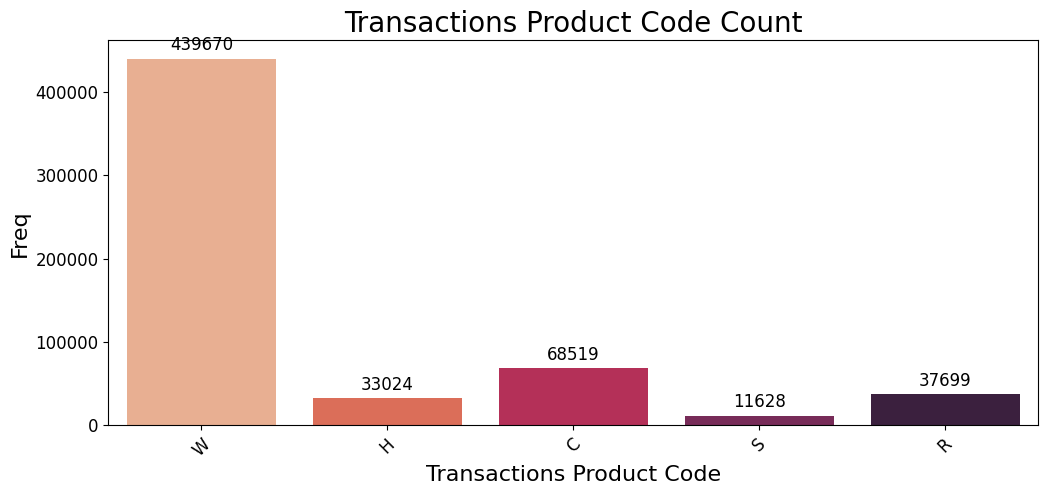

In [17]:
countplot(merged_df, "ProductCD", "Transactions Product Code", "Freq", palette="rocket_r")

In [18]:
card_cols = [c for c in merged_df.columns if 'card' in c]
merged_df[card_cols].head()

,card1,card2,card3,card4,card5,card6
0,13926,NaN,150.0,discover,142.0,credit
1,2755,404.0,150.0,mastercard,102.0,credit
2,4663,490.0,150.0,visa,166.0,debit
3,18132,567.0,150.0,mastercard,117.0,debit
4,4497,514.0,150.0,mastercard,102.0,credit


/tmp/ipykernel_55/1219683543.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=data, x=xcolumn, hue=hue, palette=palette)


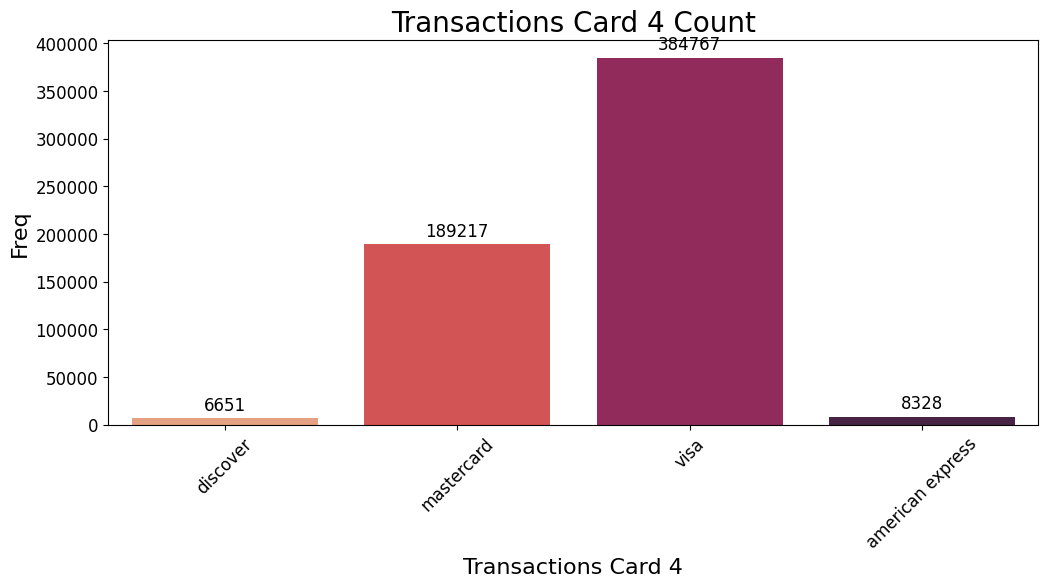

/tmp/ipykernel_55/1219683543.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=data, x=xcolumn, hue=hue, palette=palette)


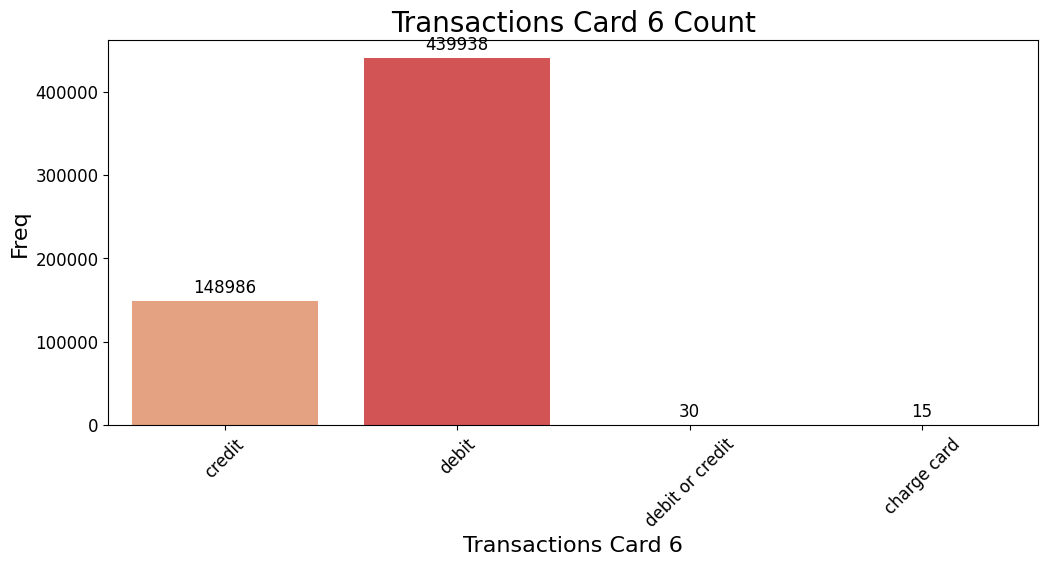

In [19]:
# card 4 and card 6 are categories.
countplot(merged_df, "card4", "Transactions Card 4", "Freq", palette="rocket_r")
countplot(merged_df, "card6", "Transactions Card 6", "Freq", palette="rocket_r")

/tmp/ipykernel_55/1219683543.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=data, x=xcolumn, hue=hue, palette=palette)


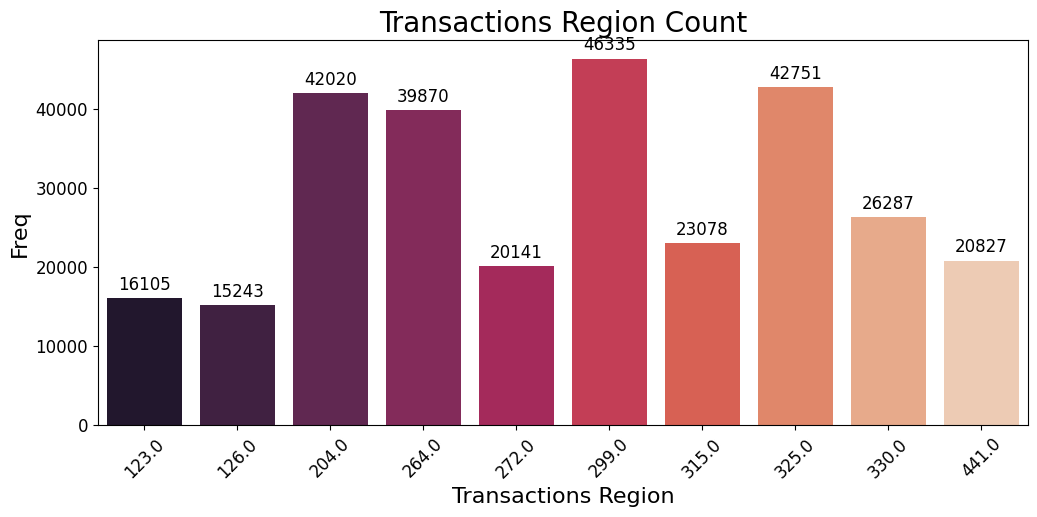

In [20]:
addr_df = pd.DataFrame(merged_df['addr1'].value_counts())
addr_df = addr_df.rename_axis("region").reset_index().head(10)
top_region = merged_df[merged_df['addr1'].isin(list(addr_df['region']))]

countplot(top_region, "addr1", "Transactions Region", "Freq", palette="rocket")

/tmp/ipykernel_55/1219683543.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=data, x=xcolumn, hue=hue, palette=palette)


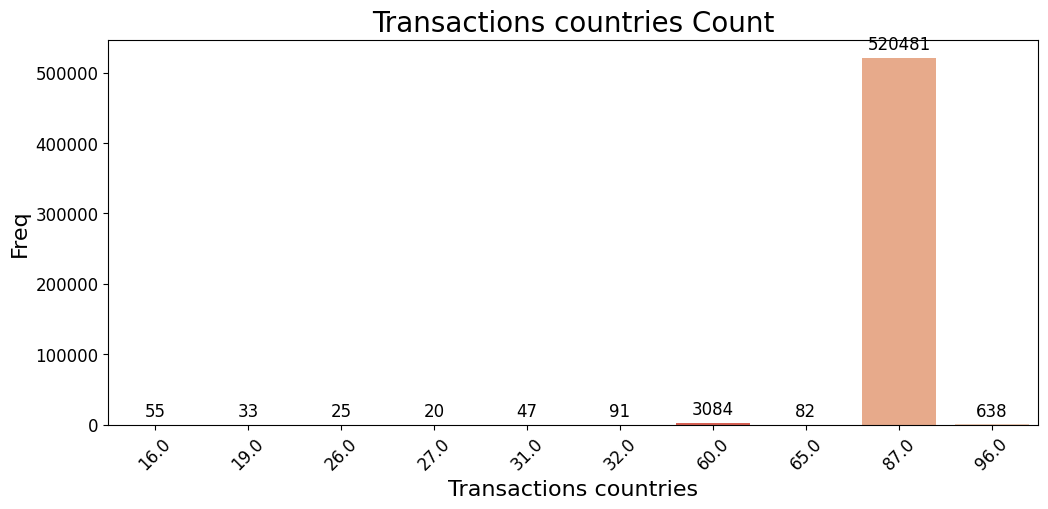

In [21]:
addr_df = pd.DataFrame(merged_df['addr2'].value_counts()).head(10)
addr_df = addr_df.rename_axis("country").reset_index()
top_region = merged_df[merged_df['addr2'].isin(list(addr_df['country']))]

countplot(top_region, "addr2", "Transactions countries", "Freq", palette="rocket")

/tmp/ipykernel_55/1219683543.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=data, x=xcolumn, hue=hue, palette=palette)


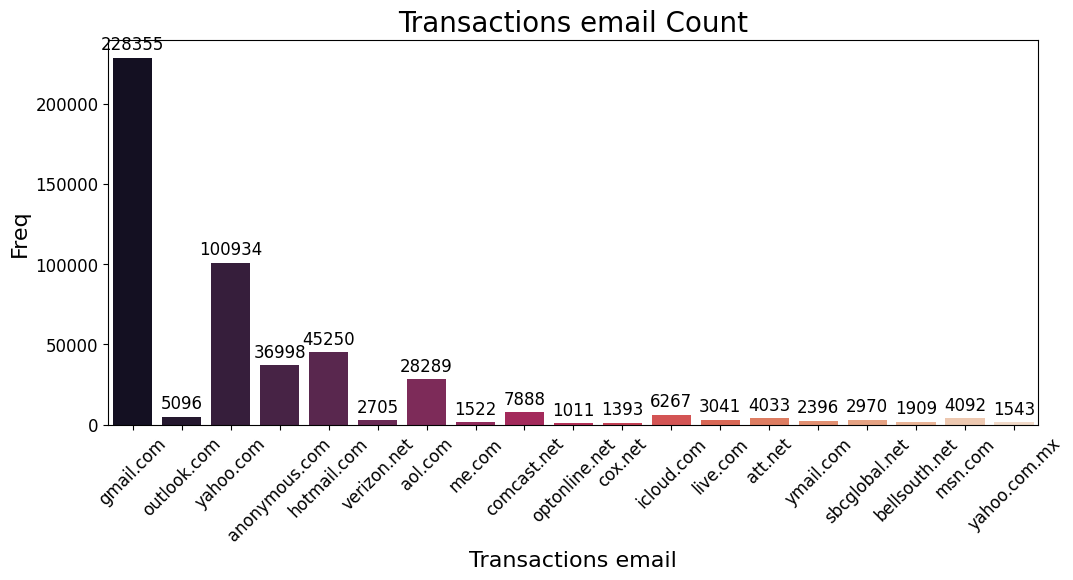

In [22]:
# check the count of each email
pemail = pd.DataFrame(merged_df['P_emaildomain'].value_counts())
pemail = pemail.rename_axis("email").reset_index()
pemail=pemail[pemail['count']>1000]
pemail = merged_df[merged_df['P_emaildomain'].isin(list(pemail['email']))]

countplot(pemail, "P_emaildomain", "Transactions email", "Freq", palette="rocket")

/tmp/ipykernel_55/1219683543.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=data, x=xcolumn, hue=hue, palette=palette)


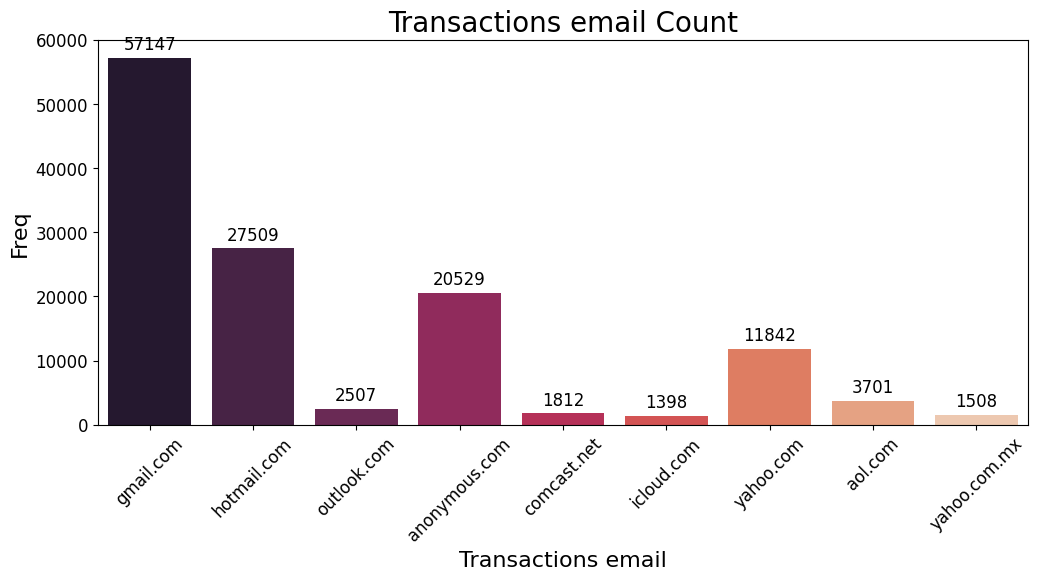

In [23]:
# check the count of each email
pemail = pd.DataFrame(merged_df['R_emaildomain'].value_counts())
pemail = pemail.rename_axis("email").reset_index()
pemail=pemail[pemail['count']>1000]
pemail = merged_df[merged_df['R_emaildomain'].isin(list(pemail['email']))]

countplot(pemail, "R_emaildomain", "Transactions email", "Freq", palette="rocket")

/tmp/ipykernel_55/1219683543.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=data, x=xcolumn, hue=hue, palette=palette)


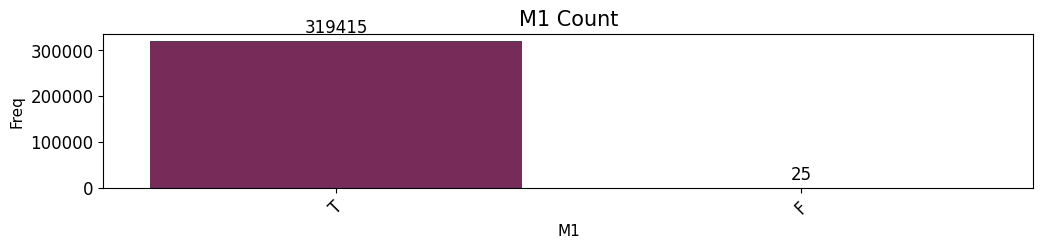

/tmp/ipykernel_55/1219683543.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=data, x=xcolumn, hue=hue, palette=palette)


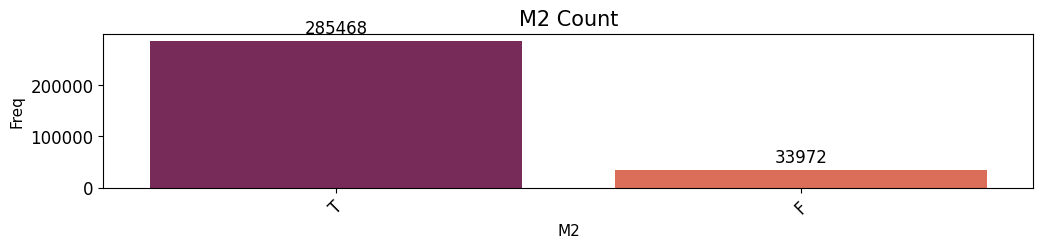

/tmp/ipykernel_55/1219683543.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=data, x=xcolumn, hue=hue, palette=palette)


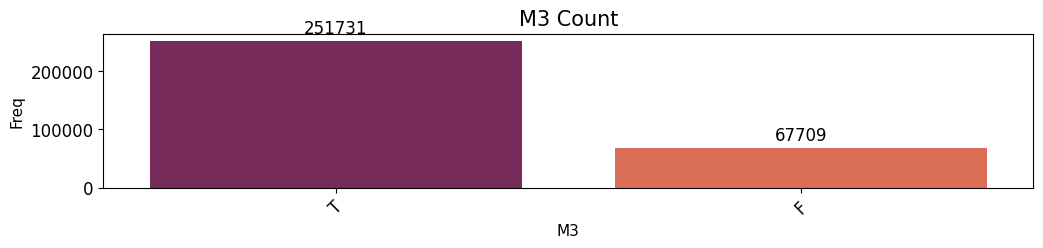

/tmp/ipykernel_55/1219683543.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=data, x=xcolumn, hue=hue, palette=palette)


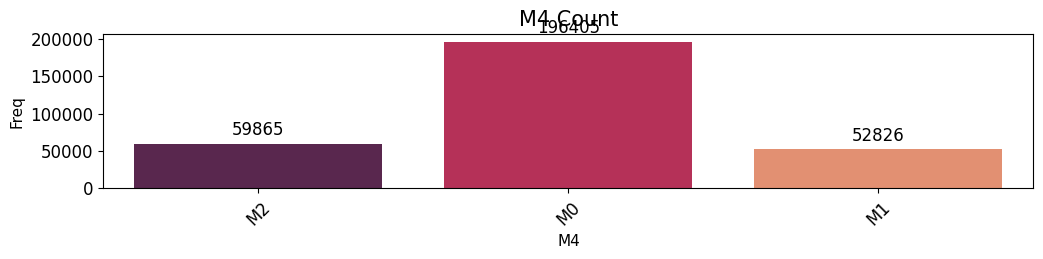

/tmp/ipykernel_55/1219683543.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=data, x=xcolumn, hue=hue, palette=palette)


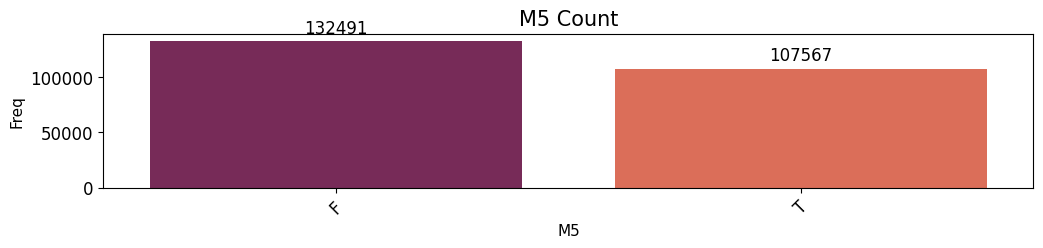

/tmp/ipykernel_55/1219683543.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=data, x=xcolumn, hue=hue, palette=palette)


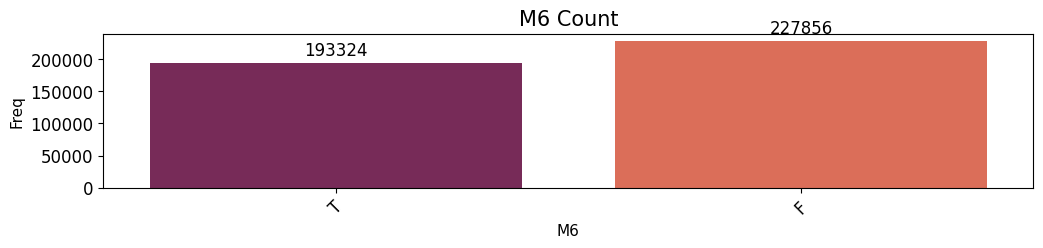

/tmp/ipykernel_55/1219683543.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=data, x=xcolumn, hue=hue, palette=palette)


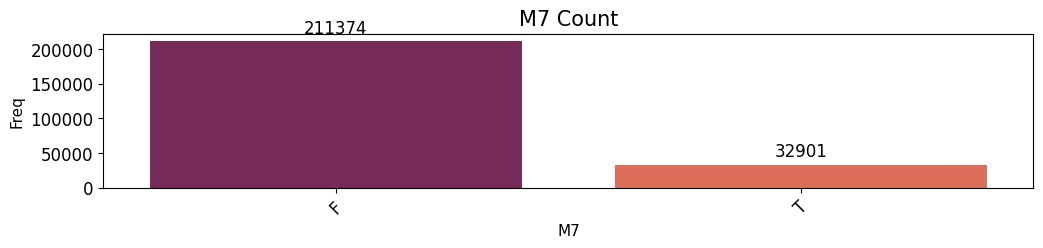

/tmp/ipykernel_55/1219683543.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=data, x=xcolumn, hue=hue, palette=palette)


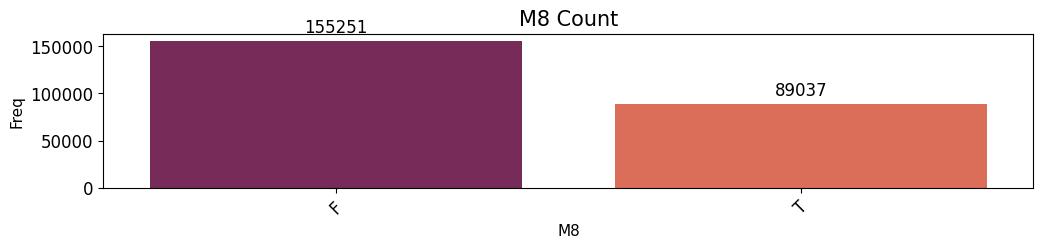

/tmp/ipykernel_55/1219683543.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=data, x=xcolumn, hue=hue, palette=palette)


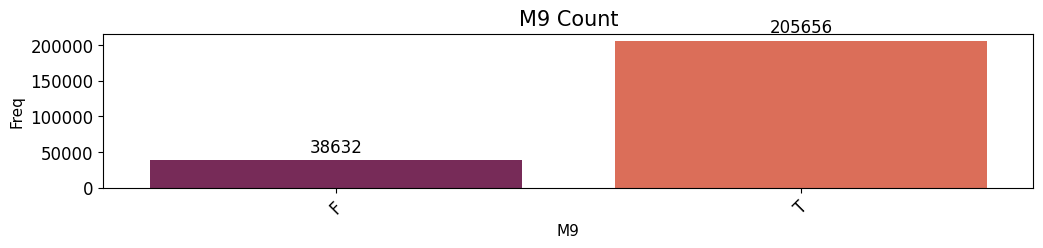

In [24]:
M_cols = [m for m in merged_df.columns if 'M' in m]
merged_df[M_cols].head()

for col in M_cols:
    countplot(merged_df, col, col, "Freq", palette="rocket", fontsize_label=11, fontsize_title=15, figsize_x=12, figsize_y=2)

In [25]:
# ccols=[c for c in merged_df.columns if 'C' in c]
# merged_df[ccols].describe()

In [26]:
# vcols=[c for c in merged_df.columns if 'V' in c]
# merged_df[vcols].head()

In [27]:
# idcols = [i for i in merged_df.columns if 'id' in i]
# idcols_cat = [i for i in idcols if merged_df[i].dtype=='object' and i not in ['id_30', 'id_31', 'id_33']]

# for col in idcols_cat:
#     countplot(merged_df, col, col, "Freq", palette="rocket", fontsize_label=11, fontsize_title=15, figsize_x=12, figsize_y=2)


In [28]:
# id30 = pd.DataFrame(merged_df['id_30'].value_counts())
# id30 = id30.rename_axis("OS").reset_index().head(20)
# id30 = id30[id30['count']>1000]

# ax = sns.barplot(data=id30, x='OS', y='count')

# # Add value labels on bars
# for container in ax.containers:
#     ax.bar_label(container, fmt='%.0f')

# plt.xticks(rotation=45)
# plt.show()

# Bivariate Analysis

In [29]:
def countplot_by_target(data, xcolumn, ycolumn, xlabel, ylabel, hue=None, fontsize_label=16, fontsize_title=20, fontsize_text=12, rotation=45, figsize_x=12, figsize_y=5, palette="mako"):
  plt.figure(figsize=(figsize_x, figsize_y))
  ax = sns.countplot(data=data, x=xcolumn, hue=ycolumn, palette=palette)
  # Add value labels on bars
  for container in ax.containers:
      ax.bar_label(container, fontsize=fontsize_text, padding=3)
  plt.xlabel(xlabel, fontsize=fontsize_label)
  plt.ylabel(ylabel, fontsize=fontsize_label)
  plt.xticks(rotation=rotation, fontsize=fontsize_text)
  plt.yticks(fontsize=fontsize_text)
  plt.title(f"{xlabel} Count", fontsize=fontsize_title)
  plt.show()

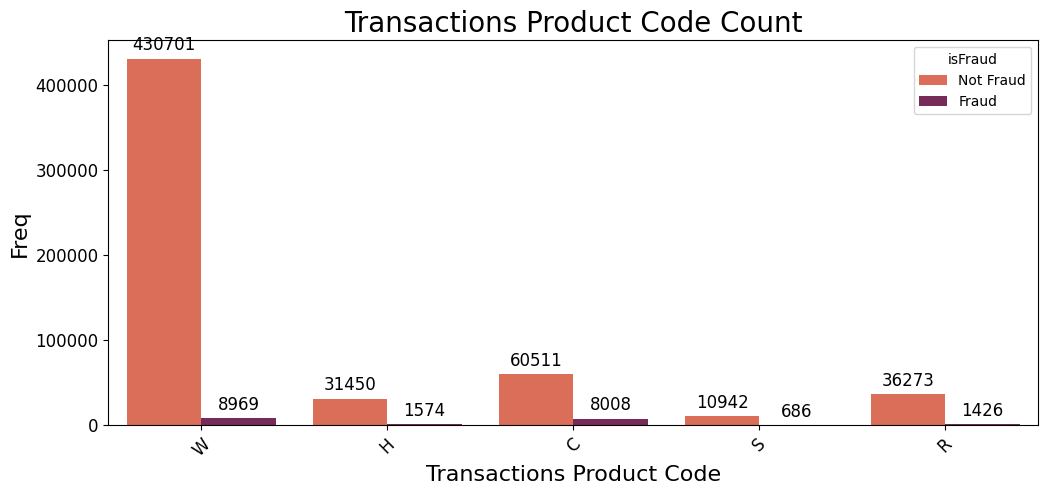

In [30]:
# ProductCD vs target
countplot_by_target(merged_df, "ProductCD", "isFraud", "Transactions Product Code", "Freq", palette="rocket_r")

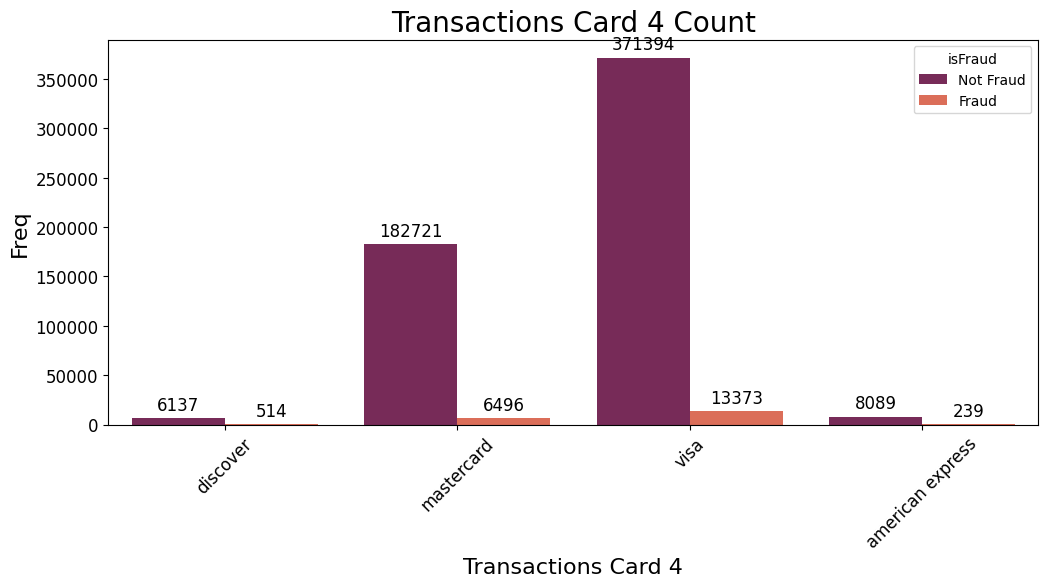

In [31]:
cardcols = [c for c in merged_df.columns if 'card' in c]
merged_df[card_cols].head()

# Check which card are being used for fraud
countplot_by_target(merged_df, "card4", "isFraud", "Transactions Card 4", "Freq", palette="rocket")

In [32]:
# # there might me more data instances related to visa. lets look at % of fraud in each card
# merged_df.groupby('card4').agg({'isFraud':'count', 'TransactionAmt':'sum'})

In [33]:
# df = merged_df.loc[:, ["card4", "isFraud"]].copy()
# df = df.dropna(subset=["card4", "isFraud"])
# fraud_flag = (df["isFraud"] == "Fraud")

# # total transactions per card4
# total = df["card4"].value_counts(dropna=False)
# fraud = df.loc[fraud_flag, "card4"].value_counts(dropna=False)

# # align indexes + fill missing fraud counts with 0
# summary = pd.DataFrame({
#     "Total": total,
#     "Fraud": fraud
# }).fillna(0)

# # compute Not Fraud + %
# summary["Not Fraud"] = summary["Total"] - summary["Fraud"]
# summary["Fraud_%"] = (summary["Fraud"] / summary["Total"]) * 100

# # sort (highest fraud rate first)
# summary = summary.sort_values("Fraud_%", ascending=False)

# summary


In [34]:
# # card6 vs target. Check which card type is used.
# countplot_by_target(merged_df, "card6", "isFraud", "Transactions Card", "Freq", palette="rocket_r")

In [35]:
# addr_df = pd.DataFrame(merged_df['addr1'].value_counts())
# addr_df = addr_df.rename_axis("region").reset_index().head(10)
# top_region = merged_df[merged_df['addr1'].isin(list(addr_df['region']))]

# countplot_by_target(top_region, "addr1", "isFraud", "Transactions Region", "Freq", palette="rocket")

In [36]:
# df = top_region
# fraud_flag = (df["isFraud"] == "Fraud")

# # total transactions per card4
# total = df["addr1"].value_counts(dropna=False)
# fraud = df.loc[fraud_flag, "addr1"].value_counts(dropna=False)

# # align indexes + fill missing fraud counts with 0
# summary = pd.DataFrame({
#     "Total": total,
#     "Fraud": fraud
# }).fillna(0)

# # compute Not Fraud + %
# summary["Not Fraud"] = summary["Total"] - summary["Fraud"]
# summary["Fraud_%"] = (summary["Fraud"] / summary["Total"]) * 100

# # sort (highest fraud rate first)
# summary = summary.sort_values("Fraud_%", ascending=False)

# summary

In [37]:
# # Which email recipient is most used for fraud activities.
# countplot_by_target(pemail, 'P_emaildomain', 'isFraud', 'Email used by purchaser', 'Freq', palette='rocket')

In [38]:
# pemailvsfraud = pd.DataFrame(merged_df['P_emaildomain'].value_counts()).head(5)
# pemailvsfraud = pemailvsfraud.rename_axis("email").reset_index()
# pemailvsfraud

# filteremail = merged_df[merged_df['P_emaildomain'].isin(list(pemailvsfraud['email']))]

In [39]:
# countplot_by_target(filteremail, 'P_emaildomain', 'isFraud', 'Email used by purchaser', 'Freq', palette='rocket')

In [40]:
# df = filteremail
# fraud_flag = (df["isFraud"] == "Fraud")

# # total transactions per card4
# total = df["P_emaildomain"].value_counts(dropna=False)
# fraud = df.loc[fraud_flag, "P_emaildomain"].value_counts(dropna=False)

# # align indexes + fill missing fraud counts with 0
# summary = pd.DataFrame({
#     "Total": total,
#     "Fraud": fraud
# }).fillna(0)

# # compute Not Fraud + %
# summary["Not Fraud"] = summary["Total"] - summary["Fraud"]
# summary["Fraud_%"] = (summary["Fraud"] / summary["Total"]) * 100

# # sort (highest fraud rate first)
# summary = summary.sort_values("Fraud_%", ascending=False)

# summary

In [41]:
# remailvsfraud = pd.DataFrame(merged_df['R_emaildomain'].value_counts()).head(5)
# remailvsfraud = remailvsfraud.rename_axis("email").reset_index()
# remailvsfraud

# filteremail = merged_df[merged_df['R_emaildomain'].isin(list(remailvsfraud['email']))]

In [42]:
# countplot_by_target(filteremail, 'R_emaildomain', 'isFraud', 'Email used by Recipient', 'Freq', palette='rocket')

In [43]:
# df = filteremail
# fraud_flag = (df["isFraud"] == "Fraud")

# # total transactions in R email
# total = df["R_emaildomain"].value_counts(dropna=False)
# fraud = df.loc[fraud_flag, "R_emaildomain"].value_counts(dropna=False)

# # align indexes + fill missing fraud counts with 0
# summary = pd.DataFrame({
#     "Total": total,
#     "Fraud": fraud
# }).fillna(0)

# # compute Not Fraud + %
# summary["Not Fraud"] = summary["Total"] - summary["Fraud"]
# summary["Fraud_%"] = (summary["Fraud"] / summary["Total"]) * 100

# # sort (highest fraud rate first)
# summary = summary.sort_values("Fraud_%", ascending=False)

# summary

In [44]:
# M_cols = [m for m in merged_df.columns if 'M' in m]
# merged_df[M_cols].head()

# for col in M_cols:
#     countplot_by_target(merged_df, col, "isFraud", col, "Freq", palette="rocket_r", fontsize_label=11, fontsize_title=15, figsize_x=12, figsize_y=2)

In [45]:
merged_df['isFraud_'] = np.where(merged_df['isFraud']=='Fraud', 1, 0)

1. W has most fraud followed by C. More data instances are W.
2. when you look at count data, visa has more fraud followed by mastercard>discover>amex. But when you look at % discover is more than visa and amex. Discover is more open to fraudlent activities.
3. most transactions belong to 299 address. more fraud data address belongs to 330, 272, 204, 441. Just like this in 'addr2', 65th have more fraudlent activities.
4. Most fraud cases coming from gmail.com followed by yahoo. But when we look at the % of fraud cases in each category hotmail.com has high 5% fraud cases followed by gmail.
5. Similarly, recipients that are using gmail.com are mostly recieved fraud emails followed by hotmail.com.
6. M2 has more % of fraud cases.

# Removing Null Values

In [46]:
# Check % nulls
null_percent = (merged_df.isnull().sum()/len(merged_df))*100
null_count = merged_df.isnull().sum()
missing_data =pd.DataFrame({
    'null_count':null_count,
    'null_percent (%)':null_percent
})
missing_data = missing_data.sort_values(by='null_percent (%)', ascending=False)
print(missing_data)

                null_count  null_percent (%)
id_24               585793         99.196159
id_25               585408         99.130965
id_07               585385         99.127070
id_08               585385         99.127070
id_21               585381         99.126393
...                    ...               ...
TransactionAmt           0          0.000000
TransactionDT            0          0.000000
isFraud                  0          0.000000
TransactionID            0          0.000000
isFraud_                 0          0.000000

[435 rows x 2 columns]


In [47]:
merged_df['card2']=merged_df['card2'].fillna(0)
merged_df['card3']=merged_df['card3'].fillna(0)
merged_df['card4']=merged_df['card4'].fillna('card_unknown')
merged_df['card5']=merged_df['card5'].fillna(0)
merged_df['card6']=merged_df['card6'].fillna('no card')
merged_df[['addr1', 'addr2']]=merged_df[['addr1', 'addr2']].fillna(0)
merged_df['dist1']=merged_df['dist1'].fillna(0)
merged_df['dist2']=merged_df['dist2'].fillna(0)
merged_df['P_emaildomain']=merged_df['P_emaildomain'].fillna('no email')
merged_df['R_emaildomain']=merged_df['R_emaildomain'].fillna('no email')
D_cols_fill = [f"D{i}" for i in range(1, 16) if f"D{i}" in merged_df.columns]
# fill D cols with median
merged_df[D_cols_fill] = merged_df[D_cols_fill].fillna(merged_df[D_cols_fill].median())

In [48]:
v_cols = [c for c in merged_df.columns if c.startswith("V")]

n = len(merged_df)  # number of rows
v_missing_pct = pd.Series(
    {c: (merged_df[c].isna().sum() * 100.0 / n) for c in v_cols},
    name="missing_pct"
).sort_values(ascending=False)

v_missing_pct.head(20)

V146    86.123717
V149    86.123717
V158    86.123717
V148    86.123717
V147    86.123717
V138    86.123717
V142    86.123717
V139    86.123717
V140    86.123717
V141    86.123717
V163    86.123717
V161    86.123717
V162    86.123717
V157    86.123717
V154    86.123717
V155    86.123717
V156    86.123717
V153    86.123717
V150    86.122701
V144    86.122701
Name: missing_pct, dtype: float64

In [49]:
DROP_TH = 99.0     # drop V cols with >=99% missing
FLAG_TH = 80.0     # add missing flag for cols with >=80% missing
FILL_METHOD = "median"


v_cols = [c for c in merged_df.columns if c.startswith("V")]

# 2) Drop very-high-missing V columns using your v_missing_pct Series
# (v_missing_pct should already exist from your RAM-safe calc)
drop_v = v_missing_pct[v_missing_pct >= DROP_TH].index.tolist()
merged_df.drop(columns=drop_v, inplace=True, errors="ignore")

# Refresh V columns after drop
v_cols = [c for c in merged_df.columns if c.startswith("V")]

# 3) Add missing flags ONLY for high-missing V columns (keeps memory low)
high_missing_v = [c for c in v_cols if v_missing_pct.get(c, 0) >= FLAG_TH]
for c in high_missing_v:
    merged_df[c + "_is_missing"] = merged_df[c].isna().astype("int8")

# 4) Fill missing values column-by-column (RAM-safe)
for c in v_cols:
    s = merged_df[c]

    # Convert object -> numeric safely (strings become NaN)
    if s.dtype == "object":
        s = pd.to_numeric(s, errors="coerce")

    if s.isna().any():
        if FILL_METHOD == "minus1":
            s = s.fillna(-1)
        else:
            # median fill (good for traditional ML)
            med = s.median(skipna=True)
            # if entire column becomes NaN (edge case), fall back to -1
            if pd.isna(med):
                med = -1
            s = s.fillna(med)

    # Downcast to save RAM
    merged_df[c] = s.astype("float32", copy=False)

merged_df[[c for c in merged_df.columns if c.startswith("V")]].isna().sum().head()

V1    0
V2    0
V3    0
V4    0
V5    0
dtype: int64

In [50]:
id_num = [f"id_{i:02d}" for i in range(1, 12) if f"id_{i:02d}" in merged_df.columns]

for c in id_num:
    # ensure numeric
    if merged_df[c].dtype == "object":
        merged_df[c] = pd.to_numeric(merged_df[c], errors="coerce")
    med = merged_df[c].median(skipna=True)
    merged_df[c] = merged_df[c].fillna(med).astype("float32", copy=False)

cat_cols = []

# Device columns
for c in ["DeviceType", "DeviceInfo"]:
    if c in merged_df.columns:
        cat_cols.append(c)

# id_12 to id_38
for i in range(12, 39):
    col = f"id_{i}"
    if col in merged_df.columns:
        cat_cols.append(col)

# fill categorical missing
for c in cat_cols:
    # ensure it's treated as string/categorical consistently
    merged_df[c] = merged_df[c].astype("object")
    merged_df[c] = merged_df[c].fillna("Missing")

In [51]:
M_cols = [f"M{i}" for i in range(1, 10) if f"M{i}" in merged_df.columns]
merged_df[M_cols] = merged_df[M_cols].fillna(merged_df[M_cols].mode().iloc[0])

In [52]:
columns_with_nulls = merged_df.loc[:, merged_df.isna().any()]
print(columns_with_nulls)

Empty DataFrame
Columns: []
Index: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, ...]

[590540 rows x 0 columns]


# Outlier Detection

In [53]:
df = merged_df.copy()

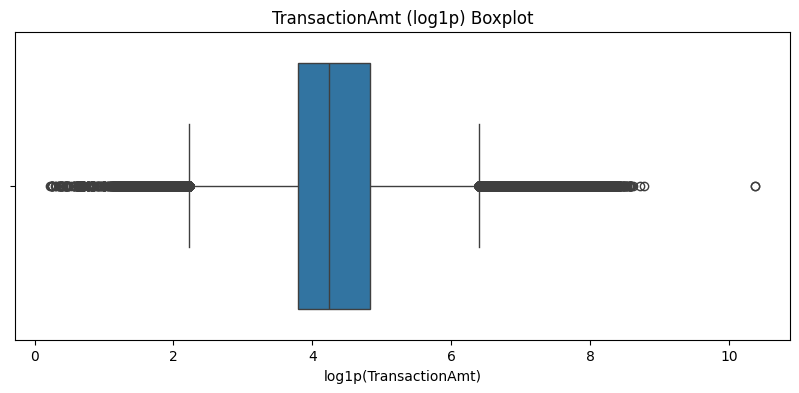

In [54]:
plt.figure(figsize=(10,4))
sns.boxplot(x=np.log1p(df["TransactionAmt"]))
plt.xlabel("log1p(TransactionAmt)")
plt.title("TransactionAmt (log1p) Boxplot")
plt.show()

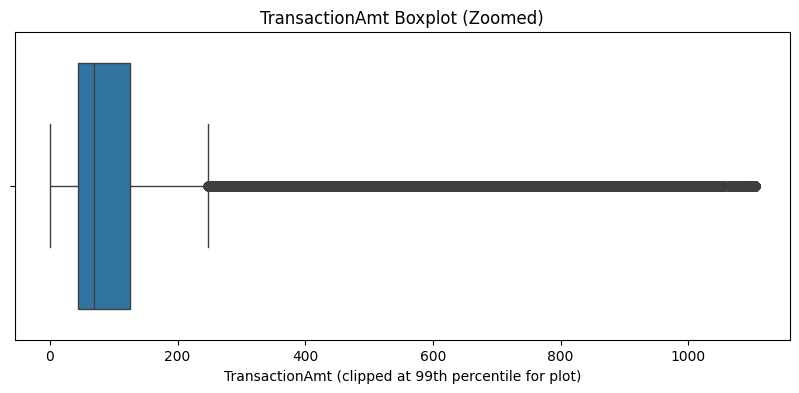

In [55]:
p99 = merged_df["TransactionAmt"].quantile(0.99)

plt.figure(figsize=(10,4))
sns.boxplot(x=merged_df["TransactionAmt"].clip(upper=p99))
plt.xlabel("TransactionAmt (clipped at 99th percentile for plot)")
plt.title("TransactionAmt Boxplot (Zoomed)")
plt.show()


In [56]:
q1=df['TransactionAmt'].quantile(0.25)
q3=df['TransactionAmt'].quantile(0.75)
IQR=q3-q1

upper = q3+1.5*IQR
lower = q1-1.5*IQR

outliers = df[(df["TransactionAmt"] < lower) | (df["TransactionAmt"] > upper)]
outliers.shape

(66482, 482)

In [57]:
outliers

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,V330_is_missing,V331_is_missing,V332_is_missing,V333_is_missing,V334_is_missing,V335_is_missing,V336_is_missing,V337_is_missing,V338_is_missing,V339_is_missing
7,2987007,Not Fraud,86529,422.50,W,12695,490.0,150.0,visa,226.0,...,1,1,1,1,1,1,1,1,1,1
31,2987031,Not Fraud,86998,363.89,W,6573,583.0,150.0,visa,226.0,...,1,1,1,1,1,1,1,1,1,1
41,2987041,Not Fraud,87220,774.00,W,9002,453.0,150.0,visa,226.0,...,1,1,1,1,1,1,1,1,1,1
56,2987056,Not Fraud,87440,500.00,W,1955,383.0,150.0,visa,226.0,...,1,1,1,1,1,1,1,1,1,1
58,2987058,Not Fraud,87532,380.21,W,16659,170.0,150.0,visa,226.0,...,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
590526,3577526,Fraud,15810876,250.00,R,1214,174.0,150.0,visa,226.0,...,0,0,0,0,0,0,0,0,0,0
590528,3577528,Not Fraud,15810907,279.95,W,15066,170.0,150.0,mastercard,102.0,...,1,1,1,1,1,1,1,1,1,1
590530,3577530,Not Fraud,15810926,400.78,W,15066,170.0,150.0,mastercard,102.0,...,1,1,1,1,1,1,1,1,1,1
590531,3577531,Not Fraud,15810935,400.00,R,6019,583.0,150.0,visa,226.0,...,0,0,0,0,0,0,0,0,0,0


In [58]:
df['TransactionAmt_capped'] = df['TransactionAmt'].clip(lower=lower, upper=upper)

<Axes: ylabel='TransactionAmt_capped'>

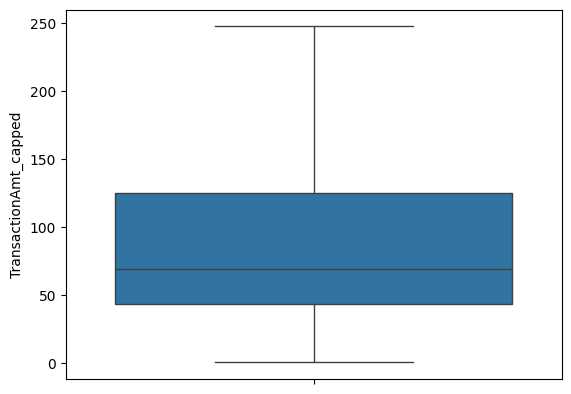

In [59]:
sns.boxplot(df['TransactionAmt_capped'])

In [60]:
df.drop(columns=['TransactionID', 'isFraud'], inplace=True)

In [61]:
from sklearn.preprocessing import LabelEncoder

labelenc = LabelEncoder()
cat_cols = [col for col in df.columns if df[col].dtype == 'object']

for col in cat_cols:
  df[col] = df[col].fillna("Missing").astype(str)
  df[col] = labelenc.fit_transform(df[col])

# Correlation Plot

<Axes: >

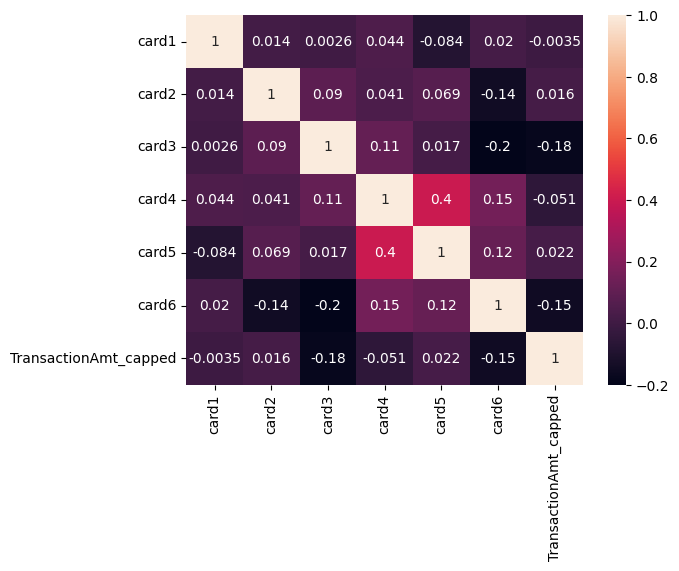

In [62]:
selected_cols = card_cols + ['TransactionAmt_capped']
sns.heatmap(df[selected_cols].corr(), annot=True)

<Axes: >

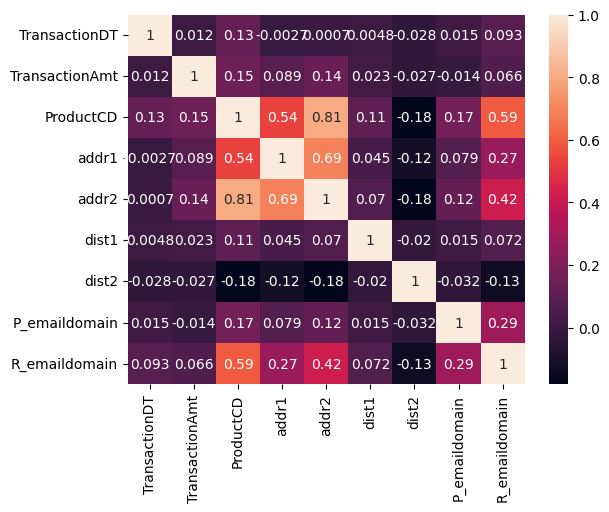

In [63]:
col1 = ['TransactionDT', 'TransactionAmt', 'ProductCD', 'addr1', 'addr2', 'dist1', 'dist2', 'P_emaildomain', 'R_emaildomain']
sns.heatmap(df[col1].corr(), annot=True)

<Axes: >

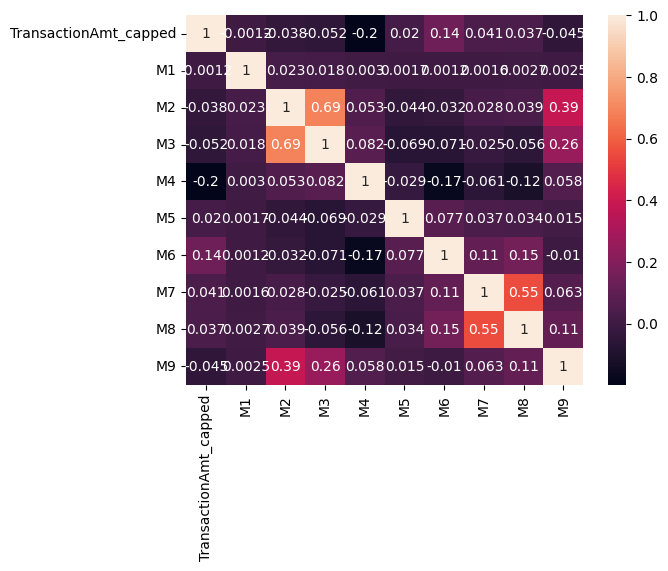

In [64]:
selected_cols = ['TransactionAmt_capped']+M_cols
sns.heatmap(df[selected_cols].corr(), annot=True)

<Axes: >

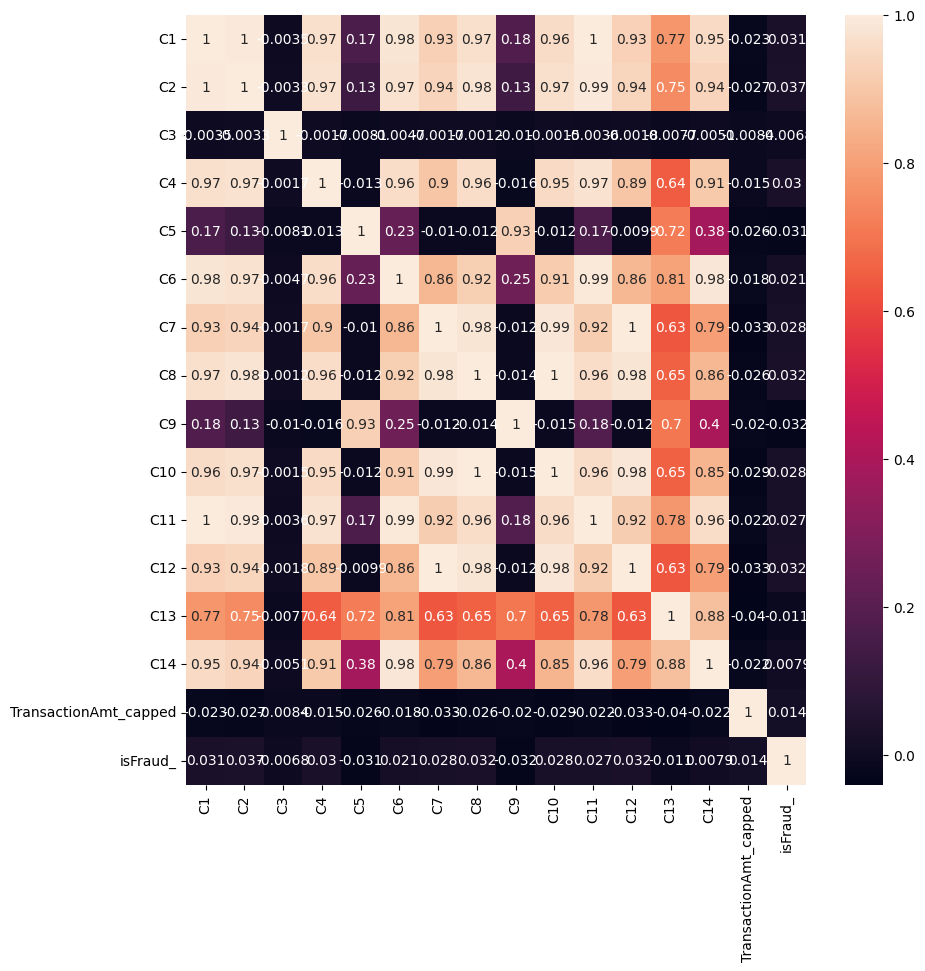

In [65]:
C_cols = [f"C{i}" for i in range(1, 15) if f"C{i}" in df.columns]

c_colslist = C_cols + ['TransactionAmt_capped', 'isFraud_']
plt.figure(figsize=(10,10))
sns.heatmap(df[c_colslist].corr(), annot=True)

<Axes: >

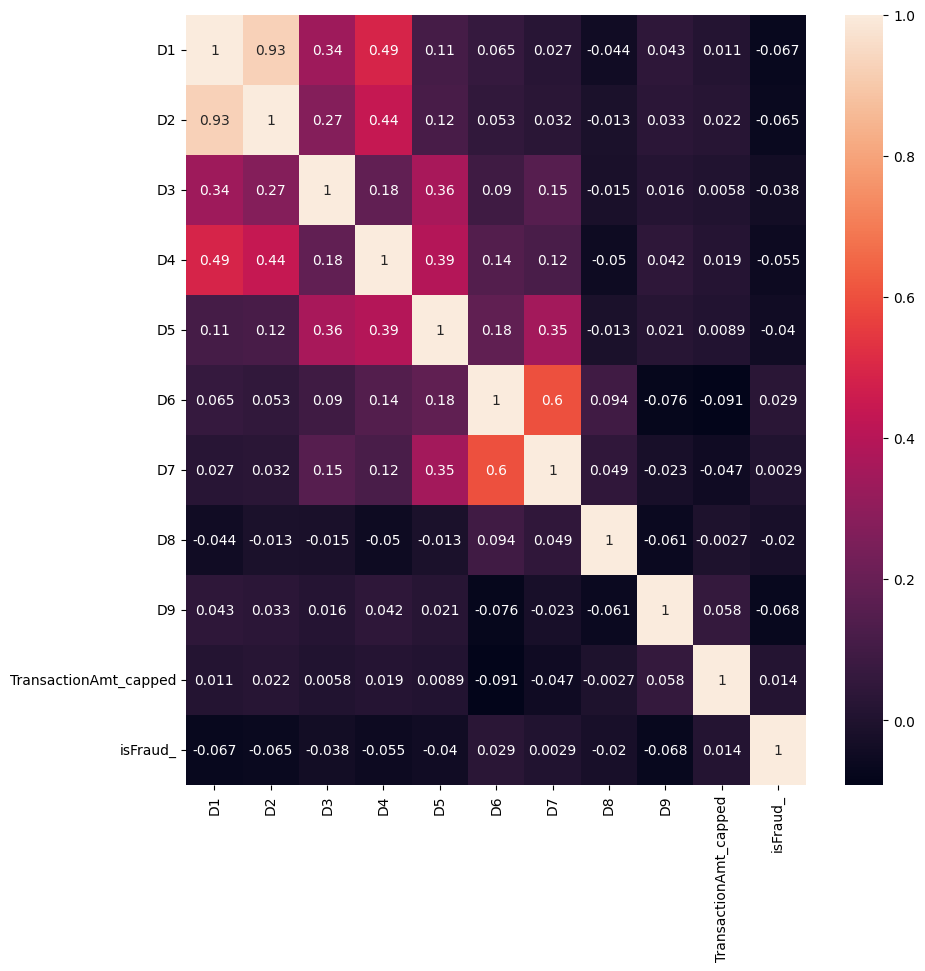

In [66]:
D_cols = [f"D{i}" for i in range(1, 10) if f"D{i}" in df.columns]

d_colslist = D_cols + ['TransactionAmt_capped', 'isFraud_']
plt.figure(figsize=(10,10))
sns.heatmap(df[d_colslist].corr(), annot=True)

<Axes: >

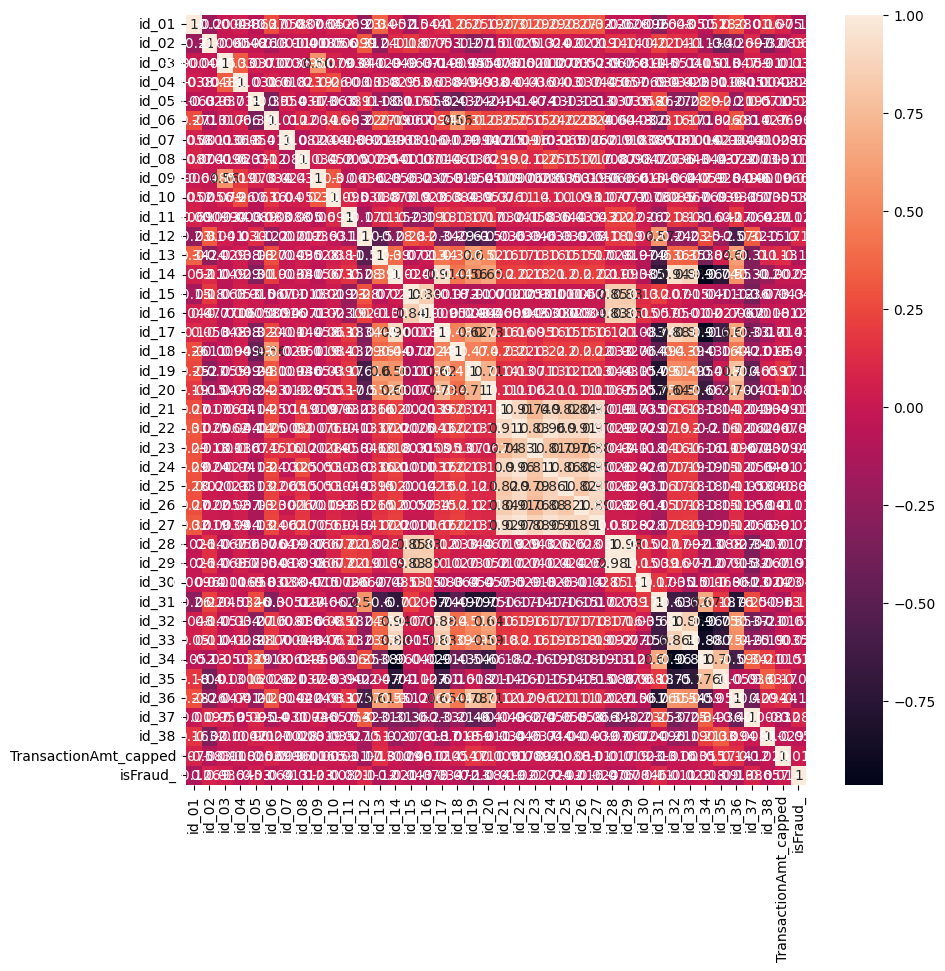

In [67]:
id_cols = [i for i in df.columns.tolist() if i.startswith("id_")]

id_colslist = id_cols + ['TransactionAmt_capped', 'isFraud_']
plt.figure(figsize=(10,10))
sns.heatmap(df[id_colslist].corr(), annot=True)

In [68]:
df.shape

(590540, 481)

In [69]:
# train test split
from sklearn.model_selection import train_test_split

X=df.drop(columns=['isFraud_'])
y=df['isFraud_']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [70]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [71]:
# training first algorithm
# 1.Logistic Regression

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

logmodel = LogisticRegression()
logmodel.fit(X_train_scaled, y_train)
pred = logmodel.predict(X_test_scaled)


print(f"Accuracy of the logistic regression model: {accuracy_score(y_test, pred)}")
print(f"Classification report: \n{classification_report(y_test, pred)}")

Accuracy of the logistic regression model: 0.971395671758052
Classification report: 
              precision    recall  f1-score   support

           0       0.97      1.00      0.99    142330
           1       0.84      0.25      0.39      5305

    accuracy                           0.97    147635
   macro avg       0.91      0.63      0.69    147635
weighted avg       0.97      0.97      0.96    147635



/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


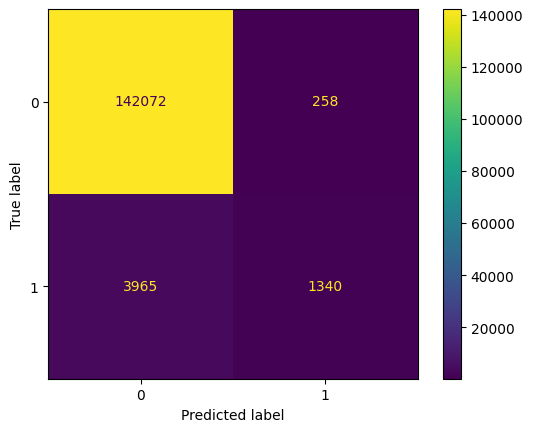

In [72]:
from sklearn.metrics import ConfusionMatrixDisplay

cm = confusion_matrix(y_test, pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=logmodel.classes_)
disp.plot()
plt.show()

In [73]:
from sklearn.metrics import average_precision_score, roc_auc_score

proba_test = logmodel.predict_proba(X_test_scaled)[:, 1]

print("PR-AUC:", average_precision_score(y_test, proba_test))
print("ROC-AUC:", roc_auc_score(y_test, proba_test))


PR-AUC: 0.45764631132473366
ROC-AUC: 0.8596398064181996


In [74]:
import numpy as np
from sklearn.metrics import precision_recall_curve, classification_report

prec, rec, thr = precision_recall_curve(y_test, proba_test)

target_recall = 0.70
idx = np.where(rec >= target_recall)[0][-1]
best_thr = thr[idx-1] if idx > 0 else 0.5

y_pred_thr = (proba_test >= best_thr).astype(int)
print("Chosen threshold:", best_thr)
print(classification_report(y_test, y_pred_thr))


Chosen threshold: 0.04224055219266852
              precision    recall  f1-score   support

           0       0.99      0.85      0.92    142330
           1       0.15      0.70      0.25      5305

    accuracy                           0.85    147635
   macro avg       0.57      0.78      0.58    147635
weighted avg       0.96      0.85      0.89    147635



In [75]:
log_reg = LogisticRegression(
    max_iter=500,
    class_weight="balanced",
    n_jobs=-1
)
log_reg.fit(X_train_scaled, y_train)

pred2=log_reg.predict(X_test_scaled)
pred2

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


array([0, 0, 0, ..., 0, 0, 1])

In [76]:
print(classification_report(y_test, pred2))

              precision    recall  f1-score   support

           0       0.99      0.83      0.90    142330
           1       0.14      0.74      0.24      5305

    accuracy                           0.83    147635
   macro avg       0.57      0.79      0.57    147635
weighted avg       0.96      0.83      0.88    147635



In [77]:
# Model 2: Decision Tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, roc_auc_score, average_precision_score

dtmodel = DecisionTreeClassifier()
dtmodel.fit(X_train_scaled, y_train)
# probabilities
preddt_proba = dtmodel.predict_proba(X_test_scaled)[:, 1]

print("ROC-AUC:", roc_auc_score(y_test, preddt_proba))
print("PR-AUC:", average_precision_score(y_test, preddt_proba))

# default threshold 0.5 (you can tune later)
preddt = (preddt_proba >= 0.5).astype(int)
print(classification_report(y_test, preddt))

ROC-AUC: 0.7768334801979152
PR-AUC: 0.32353115846455904
              precision    recall  f1-score   support

           0       0.98      0.98      0.98    142330
           1       0.54      0.57      0.55      5305

    accuracy                           0.97    147635
   macro avg       0.76      0.78      0.77    147635
weighted avg       0.97      0.97      0.97    147635



In [78]:
from sklearn.ensemble import RandomForestClassifier

rfmodel=RandomForestClassifier()
rfmodel.fit(X_train_scaled, y_train)

predrf = rfmodel.predict_proba(X_test_scaled)[:, 1]

# default threshold 0.5 (you can tune later)
predrf_prob = (predrf >= 0.5).astype(int)

print("ROC-AUC:", roc_auc_score(y_test, predrf_prob))
print("PR-AUC:", average_precision_score(y_test, predrf_prob))

# default threshold 0.5 (you can tune later)
preddt = (predrf_prob >= 0.5).astype(int)
print(classification_report(y_test, predrf_prob))

ROC-AUC: 0.7235456284207104
PR-AUC: 0.4431464095013333
              precision    recall  f1-score   support

           0       0.98      1.00      0.99    142330
           1       0.94      0.45      0.61      5305

    accuracy                           0.98    147635
   macro avg       0.96      0.72      0.80    147635
weighted avg       0.98      0.98      0.98    147635



In [79]:
# model 4: XGBoost model
from xgboost import XGBClassifier

xgbmodel = XGBClassifier()
xgbmodel.fit(X_train_scaled, y_train)

xgbpred = xgbmodel.predict_proba(X_test_scaled)[:, 1]

# default threshold 0.5 (you can tune later)
predxgb_prob = (xgbpred >= 0.5).astype(int)

print("ROC-AUC:", roc_auc_score(y_test, predxgb_prob))
print("PR-AUC:", average_precision_score(y_test, predxgb_prob))

# default threshold 0.5 (you can tune later)
preddt = (predxgb_prob >= 0.5).astype(int)
print(classification_report(y_test, predxgb_prob))

ROC-AUC: 0.749715625493131
PR-AUC: 0.4673243924201531
              precision    recall  f1-score   support

           0       0.98      1.00      0.99    142330
           1       0.90      0.50      0.64      5305

    accuracy                           0.98    147635
   macro avg       0.94      0.75      0.82    147635
weighted avg       0.98      0.98      0.98    147635



In [71]:
# Column selection
target = "isFraud_"

# only numeric columns for correlation-based removal
num_cols = df.select_dtypes(include=["number"]).columns.tolist()
num_cols = [c for c in num_cols if c != target]

corr = df[num_cols].corr().abs()

upper = corr.where(np.triu(np.ones(corr.shape), k=1).astype(bool))

to_drop = [col for col in upper.columns if (upper[col] > 0.90).any()]

print("Will drop", len(to_drop), "high-correlation numeric columns")


Will drop 230 high-correlation numeric columns


In [72]:
print(to_drop[:20])
df_reduced = df.drop(columns=to_drop)

['C2', 'C4', 'C6', 'C7', 'C8', 'C9', 'C10', 'C11', 'C12', 'C14', 'D2', 'V5', 'V11', 'V13', 'V15', 'V16', 'V18', 'V20', 'V21', 'V22']


In [73]:
# create time based features
df_reduced = df.drop(columns=to_drop)
df_reduced['day'] = (df_reduced['TransactionDT']// (24*60*60)).astype("int32")
df_reduced['hour'] = ((df_reduced["TransactionDT"] // 3600) % 24).astype("int8")
df_reduced["DT_wday"] = (df_reduced["day"] % 7).astype("int8")

<Axes: >

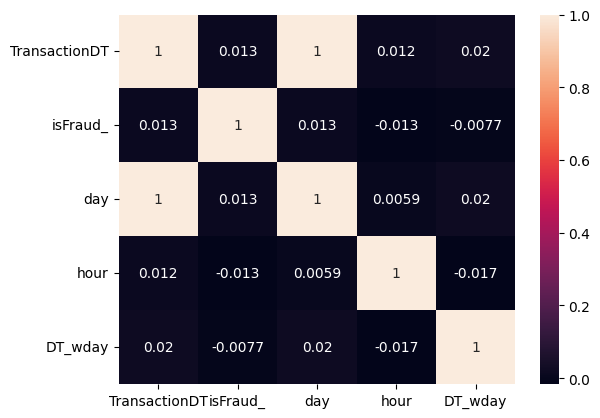

In [83]:
col1=['TransactionDT', 'isFraud_', 'day', 'hour', 'DT_wday']
sns.heatmap(df_reduced[col1].corr(), annot=True)

In [74]:
df_reduced = df_reduced.sort_values('TransactionDT')


In [ ]:
df_reduced.drop(columns=['TransactionDT'], inplace=True)

In [85]:
# Split the data and scale the data
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

split_point = int(len(df) * 0.8)   # 80% train, 20% test

train_df = df_reduced.iloc[:split_point]
test_df  = df_reduced.iloc[split_point:]

X_train = train_df.drop(columns=["isFraud_"])
y_train = train_df["isFraud_"]

X_test  = test_df.drop(columns=["isFraud_"])
y_test  = test_df["isFraud_"]

print(train_df.shape, test_df.shape)

scalar = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

(472432, 253) (118108, 253)


In [86]:
# train logisitic model
from sklearn.linear_model import LogisticRegression
classification_report, roc_auc_score, average_precision_score

logmodel1 = LogisticRegression()
logmodel1.fit(X_train_scaled, y_train)

logpred_proba = logmodel1.predict_proba(X_test_scaled)[:,1]

print("ROC-AUC:", roc_auc_score(y_test, logpred_proba))
print("PR-AUC:", average_precision_score(y_test, logpred_proba))

# default threshold 0.5
predlog = (logpred_proba >= 0.5).astype(int)
print(classification_report(y_test, predlog))

ROC-AUC: 0.8138032865630395
PR-AUC: 0.20278048518162445
              precision    recall  f1-score   support

           0       0.97      0.99      0.98    114044
           1       0.41      0.24      0.30      4064

    accuracy                           0.96    118108
   macro avg       0.69      0.61      0.64    118108
weighted avg       0.95      0.96      0.96    118108



In [87]:
from sklearn.metrics import roc_auc_score, average_precision_score, classification_report

def eval_model(name, proba, y_true, thr=0.5):
    print(f"\n=== {name} ===")
    print("ROC-AUC:", roc_auc_score(y_true, proba))
    print("PR-AUC :", average_precision_score(y_true, proba))
    pred = (proba >= thr).astype(int)
    print(classification_report(y_true, pred))


In [88]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(
    max_depth=8,              # controls overfitting (tune 6-12)
    min_samples_leaf=50,      # reduces noisy splits
    class_weight="balanced",
    random_state=42
)
dt.fit(X_train_scaled, y_train)

proba_dt = dt.predict_proba(X_test_scaled)[:, 1]
eval_model("DecisionTree", proba_dt, y_test)



=== DecisionTree ===
ROC-AUC: 0.8141327607755068
PR-AUC : 0.33620318511369846
              precision    recall  f1-score   support

           0       0.99      0.83      0.90    114044
           1       0.12      0.67      0.21      4064

    accuracy                           0.82    118108
   macro avg       0.55      0.75      0.55    118108
weighted avg       0.96      0.82      0.88    118108



In [89]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(
    n_estimators=300,
    max_depth=None,
    min_samples_leaf=50,
    n_jobs=-1,
    class_weight="balanced_subsample",
    random_state=42
)
rf.fit(X_train, y_train)

proba_rf = rf.predict_proba(X_test)[:, 1]
eval_model("RandomForest", proba_rf, y_test)



=== RandomForest ===
ROC-AUC: 0.8912390074717673
PR-AUC : 0.467378537670445
              precision    recall  f1-score   support

           0       0.99      0.92      0.95    114044
           1       0.23      0.65      0.34      4064

    accuracy                           0.91    118108
   macro avg       0.61      0.79      0.65    118108
weighted avg       0.96      0.91      0.93    118108



In [90]:
from xgboost import XGBClassifier

# imbalance handling
scale_pos_weight = (y_train == 0).sum() / (y_train == 1).sum()

xgb = XGBClassifier(
    n_estimators=500,
    max_depth=6,
    learning_rate=0.05,
    subsample=0.8,
    colsample_bytree=0.8,
    reg_lambda=1.0,
    min_child_weight=1,
    scale_pos_weight=scale_pos_weight,
    tree_method="hist",      # faster + less RAM
    n_jobs=-1,
    random_state=42
)
xgb.fit(X_train, y_train)

proba_xgb = xgb.predict_proba(X_test)[:, 1]
eval_model("XGBoost", proba_xgb, y_test)



=== XGBoost ===
ROC-AUC: 0.9073329088931555
PR-AUC : 0.5129902656567807
              precision    recall  f1-score   support

           0       0.99      0.92      0.95    114044
           1       0.24      0.69      0.36      4064

    accuracy                           0.91    118108
   macro avg       0.61      0.81      0.66    118108
weighted avg       0.96      0.91      0.93    118108



In [91]:
import numpy as np
from sklearn.metrics import precision_recall_curve, classification_report

proba = proba_xgb  #  XGBoost probabilities
prec, rec, thr = precision_recall_curve(y_test, proba)

target_recall = 0.80
idx = np.where(rec >= target_recall)[0][-1]
best_thr = thr[idx-1] if idx > 0 else 0.5

pred = (proba >= best_thr).astype(int)
print("Threshold:", best_thr)
print(classification_report(y_test, pred))


Threshold: 0.35454848
              precision    recall  f1-score   support

           0       0.99      0.85      0.92    114044
           1       0.16      0.80      0.27      4064

    accuracy                           0.85    118108
   macro avg       0.58      0.83      0.59    118108
weighted avg       0.96      0.85      0.90    118108




1. Time split
2. Frequency encode (train → apply to test)
3. SMOTE on train only
4. Tune XGB with reg_alpha/reg_lambda + early stopping on val
5. Evaluate PR-AUC + threshold selection
6. Importance + SHAP


In [92]:
from sklearn.model_selection import ParameterSampler
from imblearn.over_sampling import SMOTE
from sklearn.metrics import average_precision_score, roc_auc_score, precision_recall_curve, classification_report
from xgboost import XGBClassifier

In [93]:
# create time based features
df_reduced = df.drop(columns=to_drop)
df_reduced['day'] = (df_reduced['TransactionDT']// (24*60*60)).astype("int32")
df_reduced['hour'] = ((df_reduced["TransactionDT"] // 3600) % 24).astype("int8")
df_reduced["DT_wday"] = (df_reduced["day"] % 7).astype("int8")

In [94]:
df2= df_reduced.copy()

In [95]:
df2 = df2.sort_values("TransactionDT").reset_index(drop=True)

TARGET = "isFraud_"
TIME_COL = "TransactionDT"

# 80% train, 20% test
split_point = int(len(df) * 0.8)
train_df = df.iloc[:split_point].copy()
test_df  = df.iloc[split_point:].copy()

# Within train: 80% subtrain, 20% val (time-ordered)
val_point = int(len(train_df) * 0.8)
subtrain_df = train_df.iloc[:val_point].copy()
val_df      = train_df.iloc[val_point:].copy()

print("subtrain:", subtrain_df.shape, "val:", val_df.shape, "test:", test_df.shape)


subtrain: (377945, 481) val: (94487, 481) test: (118108, 481)


In [96]:
X_sub = subtrain_df.drop(columns=[TARGET])
y_sub = subtrain_df[TARGET].astype(int)

X_val = val_df.drop(columns=[TARGET])
y_val = val_df[TARGET].astype(int)

X_test = test_df.drop(columns=[TARGET])
y_test = test_df[TARGET].astype(int)

# SMOTE only on subtrain
smote = SMOTE(random_state=42, sampling_strategy=0.2)  
# sampling_strategy=0.2 means minority becomes 20% of majority (safer than full 1.0 for big data)

X_sub_sm, y_sub_sm = smote.fit_resample(X_sub, y_sub)

print("Before SMOTE:", y_sub.value_counts().to_dict())
print("After  SMOTE:", pd.Series(y_sub_sm).value_counts().to_dict())


Before SMOTE: {0: 365050, 1: 12895}
After  SMOTE: {0: 365050, 1: 73010}


In [98]:
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.model_selection import ParameterSampler
from sklearn.metrics import average_precision_score

param_grid = {
    "max_depth": [3,4,5,6,7],
    "min_child_weight": [1,3,5,10],
    "subsample": [0.6,0.8,1.0],
    "colsample_bytree": [0.6,0.8,1.0],
    "gamma": [0, 0.1, 0.3, 1.0],
    "reg_alpha": [0.0, 0.1, 0.5, 1.0],   # L1 (Lasso)
    "reg_lambda": [0.5, 1.0, 2.0, 5.0],  # L2 (Ridge)
    "learning_rate": [0.01, 0.03, 0.05, 0.1],
}

n_iter = 20
candidates = list(ParameterSampler(param_grid, n_iter=n_iter, random_state=42))

best_score = -1
best_model = None
best_params = None

for i, p in enumerate(candidates, 1):
    model = XGBClassifier(
        n_estimators=5000,
        tree_method="hist",      # ✅ GPU training
        predictor="gpu_predictor",   # ✅ GPU prediction
        device="cuda",               # ✅ (supported in newer xgboost)
        eval_metric="aucpr",
        random_state=42,
        n_jobs=1,                    # ✅ best practice on GPU (avoid CPU thread contention)
        early_stopping_rounds=100,
        **p
    )

    model.fit(
        X_sub_sm, y_sub_sm,
        eval_set=[(X_val, y_val)],
        verbose=False
    )

    val_proba = model.predict_proba(X_val)[:, 1]
    val_prauc = average_precision_score(y_val, val_proba)

    if val_prauc > best_score:
        best_score = val_prauc
        best_model = model
        best_params = p

    print(f"[{i}/{n_iter}] Val PR-AUC={val_prauc:.4f} best={best_score:.4f}")

print("\nBest Val PR-AUC:", best_score)
print("Best params:", best_params)
print("Best iteration:", best_model.best_iteration)


/usr/local/lib/python3.12/dist-packages/xgboost/callback.py:386: UserWarning: [23:57:21] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "predictor" } are not used.

  self.starting_round = model.num_boosted_rounds()
/usr/local/lib/python3.12/dist-packages/xgboost/core.py:774: UserWarning: [23:58:40] WARNING: /workspace/src/common/error_msg.cc:41: Falling back to prediction using DMatrix due to mismatched devices. This might lead to higher memory usage and slower performance. XGBoost is running on: cuda:0, while the input data is on: cpu.
Potential solutions:
- Use a data structure that matches the device ordinal in the booster.
- Set the device for booster before call to inplace_predict.

This warning will only be shown once.

  return func(**kwargs)


[1/20] Val PR-AUC=0.6038 best=0.6038


/usr/local/lib/python3.12/dist-packages/xgboost/callback.py:386: UserWarning: [23:59:02] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "predictor" } are not used.

  self.starting_round = model.num_boosted_rounds()


[2/20] Val PR-AUC=0.6197 best=0.6197


/usr/local/lib/python3.12/dist-packages/xgboost/callback.py:386: UserWarning: [00:00:58] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "predictor" } are not used.

  self.starting_round = model.num_boosted_rounds()


[3/20] Val PR-AUC=0.6311 best=0.6311


/usr/local/lib/python3.12/dist-packages/xgboost/callback.py:386: UserWarning: [00:01:38] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "predictor" } are not used.

  self.starting_round = model.num_boosted_rounds()


[4/20] Val PR-AUC=0.6041 best=0.6311


/usr/local/lib/python3.12/dist-packages/xgboost/callback.py:386: UserWarning: [00:02:22] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "predictor" } are not used.

  self.starting_round = model.num_boosted_rounds()


[5/20] Val PR-AUC=0.6257 best=0.6311


/usr/local/lib/python3.12/dist-packages/xgboost/callback.py:386: UserWarning: [00:03:04] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "predictor" } are not used.

  self.starting_round = model.num_boosted_rounds()


[6/20] Val PR-AUC=0.6317 best=0.6317


/usr/local/lib/python3.12/dist-packages/xgboost/callback.py:386: UserWarning: [00:04:18] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "predictor" } are not used.

  self.starting_round = model.num_boosted_rounds()


[7/20] Val PR-AUC=0.5981 best=0.6317


/usr/local/lib/python3.12/dist-packages/xgboost/callback.py:386: UserWarning: [00:05:08] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "predictor" } are not used.

  self.starting_round = model.num_boosted_rounds()


[8/20] Val PR-AUC=0.6258 best=0.6317


/usr/local/lib/python3.12/dist-packages/xgboost/callback.py:386: UserWarning: [00:06:02] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "predictor" } are not used.

  self.starting_round = model.num_boosted_rounds()


[9/20] Val PR-AUC=0.6334 best=0.6334


/usr/local/lib/python3.12/dist-packages/xgboost/callback.py:386: UserWarning: [00:06:57] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "predictor" } are not used.

  self.starting_round = model.num_boosted_rounds()


[10/20] Val PR-AUC=0.6349 best=0.6349


/usr/local/lib/python3.12/dist-packages/xgboost/callback.py:386: UserWarning: [00:08:16] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "predictor" } are not used.

  self.starting_round = model.num_boosted_rounds()


[11/20] Val PR-AUC=0.6220 best=0.6349


/usr/local/lib/python3.12/dist-packages/xgboost/callback.py:386: UserWarning: [00:10:08] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "predictor" } are not used.

  self.starting_round = model.num_boosted_rounds()


[12/20] Val PR-AUC=0.6233 best=0.6349


/usr/local/lib/python3.12/dist-packages/xgboost/callback.py:386: UserWarning: [00:10:51] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "predictor" } are not used.

  self.starting_round = model.num_boosted_rounds()


[13/20] Val PR-AUC=0.6241 best=0.6349


/usr/local/lib/python3.12/dist-packages/xgboost/callback.py:386: UserWarning: [00:12:30] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "predictor" } are not used.

  self.starting_round = model.num_boosted_rounds()


[14/20] Val PR-AUC=0.6340 best=0.6349


/usr/local/lib/python3.12/dist-packages/xgboost/callback.py:386: UserWarning: [00:14:31] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "predictor" } are not used.

  self.starting_round = model.num_boosted_rounds()


[15/20] Val PR-AUC=0.6265 best=0.6349


/usr/local/lib/python3.12/dist-packages/xgboost/callback.py:386: UserWarning: [00:15:48] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "predictor" } are not used.

  self.starting_round = model.num_boosted_rounds()


[16/20] Val PR-AUC=0.6222 best=0.6349


/usr/local/lib/python3.12/dist-packages/xgboost/callback.py:386: UserWarning: [00:17:05] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "predictor" } are not used.

  self.starting_round = model.num_boosted_rounds()


[17/20] Val PR-AUC=0.6220 best=0.6349


/usr/local/lib/python3.12/dist-packages/xgboost/callback.py:386: UserWarning: [00:17:59] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "predictor" } are not used.

  self.starting_round = model.num_boosted_rounds()


[18/20] Val PR-AUC=0.5984 best=0.6349


/usr/local/lib/python3.12/dist-packages/xgboost/callback.py:386: UserWarning: [00:19:12] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "predictor" } are not used.

  self.starting_round = model.num_boosted_rounds()


[19/20] Val PR-AUC=0.6036 best=0.6349


/usr/local/lib/python3.12/dist-packages/xgboost/callback.py:386: UserWarning: [00:20:09] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "predictor" } are not used.

  self.starting_round = model.num_boosted_rounds()


[20/20] Val PR-AUC=0.5959 best=0.6349

Best Val PR-AUC: 0.6349376430773308
Best params: {'subsample': 0.8, 'reg_lambda': 2.0, 'reg_alpha': 0.1, 'min_child_weight': 10, 'max_depth': 7, 'learning_rate': 0.03, 'gamma': 1.0, 'colsample_bytree': 1.0}
Best iteration: 2929


In [122]:
# Evaluate on TEST (PR-AUC + ROC-AUC)
test_proba = best_model.predict_proba(X_test)[:, 1]

print("TEST ROC-AUC:", roc_auc_score(y_test, test_proba))
print("TEST PR-AUC :", average_precision_score(y_test, test_proba))


TEST ROC-AUC: 0.8916143665937613
TEST PR-AUC : 0.5011094035202742


In [123]:
# Threshold selection 
# (use VAL to choose threshold, then apply to TEST)
val_proba = best_model.predict_proba(X_val)[:, 1]
prec, rec, thr = precision_recall_curve(y_val, val_proba)

f1 = 2 * (prec * rec) / (prec + rec + 1e-12)
best_idx = np.argmax(f1[:-1])  # thr length is len(prec)-1
best_thr = thr[best_idx]

print("Chosen threshold (from VAL, max F1):", best_thr)


Chosen threshold (from VAL, max F1): 0.36963618


In [124]:
test_pred = (test_proba >= best_thr).astype(int)
print(classification_report(y_test, test_pred))


              precision    recall  f1-score   support

           0       0.98      0.99      0.98    114044
           1       0.56      0.44      0.50      4064

    accuracy                           0.97    118108
   macro avg       0.77      0.71      0.74    118108
weighted avg       0.97      0.97      0.97    118108



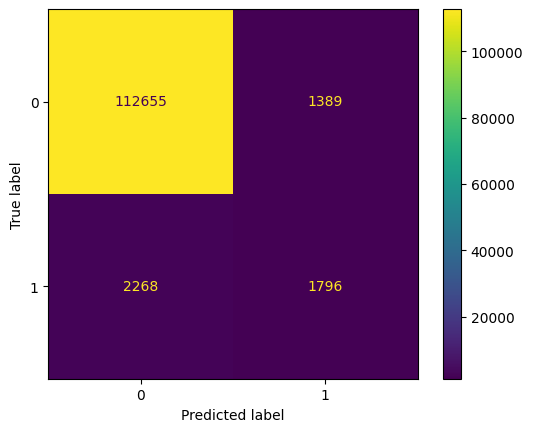

In [125]:
from sklearn.metrics import ConfusionMatrixDisplay

cm = confusion_matrix(y_test, test_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=logmodel.classes_)
disp.plot()
plt.show()

In [103]:
feat_imp = pd.Series(best_model.feature_importances_, index=X_test.columns)\
              .sort_values(ascending=False)

feat_imp.head(20)

V258    0.148534
V317    0.046454
V284    0.041333
V294    0.031656
V95     0.028088
V97     0.024592
C4      0.021447
V30     0.020518
V69     0.019759
V295    0.017990
V223    0.014576
V287    0.013793
V90     0.013143
V187    0.012495
V288    0.012461
V73     0.012375
V282    0.012330
V279    0.012280
V324    0.012016
V280    0.011559
dtype: float32

In [105]:
import numpy as np
from sklearn.metrics import precision_recall_curve, classification_report, average_precision_score

val_proba = best_model.predict_proba(X_val)[:, 1]
prec, rec, thr = precision_recall_curve(y_val, val_proba)

target_recall = 0.80
idx = np.where(rec >= target_recall)[0][-1]
thr_recall = thr[idx-1] if idx > 0 else 0.5

print("VAL threshold for recall>=0.80:", thr_recall)

test_proba = best_model.predict_proba(X_test)[:, 1]
test_pred_recall = (test_proba >= thr_recall).astype(int)
print(classification_report(y_test, test_pred_recall))
print("TEST PR-AUC:", average_precision_score(y_test, test_proba))  # unchanged by threshold


VAL threshold for recall>=0.80: 0.058467545
              precision    recall  f1-score   support

           0       0.99      0.90      0.94    114044
           1       0.20      0.71      0.31      4064

    accuracy                           0.89    118108
   macro avg       0.59      0.80      0.62    118108
weighted avg       0.96      0.89      0.92    118108

TEST PR-AUC: 0.5011094035202742


In [120]:
results = test_df[["TransactionDT", "TransactionAmt"]].copy()
results["actual"] = y_test.values
results["fraud_score"] = test_proba   # from best_model
results["pred"] = (test_proba >= best_thr).astype(int)  # use your chosen threshold/policy


results.to_csv("fraud_scoring_results.csv", index=False)
results

,TransactionDT,TransactionAmt,actual,fraud_score,pred
472432,12192900,33.261,1,0.041436,0
472433,12192911,52.811,0,0.001266,0
472434,12192913,136.956,0,0.404011,1
472435,12193040,136.956,0,0.337324,0
472436,12193199,25.000,0,0.001004,0
...,...,...,...,...,...
590535,15811047,49.000,0,0.003865,0
590536,15811049,39.500,0,0.020148,0
590537,15811079,30.950,0,0.004385,0
590538,15811088,117.000,0,0.040920,0


In [78]:
# train LGBM Model
df1 = df_reduced.copy()
print(df_reduced.columns.tolist())

['TransactionDT', 'TransactionAmt', 'ProductCD', 'card1', 'card2', 'card3', 'card4', 'card5', 'card6', 'addr1', 'addr2', 'dist1', 'dist2', 'P_emaildomain', 'R_emaildomain', 'C1', 'C3', 'C5', 'C13', 'D1', 'D3', 'D4', 'D5', 'D6', 'D7', 'D8', 'D9', 'D10', 'D11', 'D12', 'D13', 'D14', 'D15', 'M1', 'M2', 'M3', 'M4', 'M5', 'M6', 'M7', 'M8', 'M9', 'V1', 'V2', 'V3', 'V4', 'V6', 'V7', 'V8', 'V9', 'V10', 'V12', 'V14', 'V17', 'V19', 'V23', 'V24', 'V25', 'V26', 'V27', 'V29', 'V35', 'V37', 'V38', 'V39', 'V41', 'V42', 'V44', 'V46', 'V47', 'V48', 'V53', 'V55', 'V56', 'V59', 'V61', 'V62', 'V65', 'V66', 'V67', 'V68', 'V75', 'V77', 'V78', 'V80', 'V82', 'V83', 'V86', 'V87', 'V88', 'V89', 'V95', 'V98', 'V99', 'V100', 'V104', 'V107', 'V108', 'V109', 'V110', 'V111', 'V112', 'V114', 'V115', 'V116', 'V117', 'V118', 'V119', 'V120', 'V121', 'V122', 'V123', 'V124', 'V125', 'V129', 'V130', 'V131', 'V135', 'V136', 'V138', 'V139', 'V141', 'V142', 'V144', 'V146', 'V148', 'V161', 'V162', 'V165', 'V166', 'V169', 'V170'

In [81]:
import gc
import lightgbm as lgb

from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import roc_auc_score
from imblearn.over_sampling import SMOTE


# =========================
# 1) Data + sort by time
# =========================
df = df1.copy()

TARGET = "isFraud_"
TIME_COL = "TransactionDT"

df = df.sort_values(TIME_COL).reset_index(drop=True)

drop_cols = []
for c in [TARGET]:
    if c in drop_cols:
        drop_cols.remove(c)

[]

In [82]:
# =========================
# 2) Train/Test time split (80/20)
# =========================
split_point = int(len(df) * 0.8)
train_df = df.iloc[:split_point].copy()
test_df  = df.iloc[split_point:].copy()

print("Train/Test:", train_df.shape, test_df.shape)

y_train_full = train_df[TARGET].astype(int).values
y_test = test_df[TARGET].astype(int).values

X_train_full = train_df.drop(columns=[TARGET] + drop_cols)
X_test = test_df.drop(columns=[TARGET] + drop_cols)

Train/Test: (472432, 254) (118108, 254)


In [83]:
# =========================
# 3) Frequency encoding (fit on TRAIN ONLY, apply to TEST)
# =========================
cat_cols = X_train_full.select_dtypes(include=["object", "category"]).columns.tolist()

for c in cat_cols:
    freq = X_train_full[c].value_counts(dropna=False)
    X_train_full[c] = X_train_full[c].map(freq).fillna(0).astype("int32")
    X_test[c]       = X_test[c].map(freq).fillna(0).astype("int32")

gc.collect()

0

In [84]:
# =========================
# 4) LightGBM params (AUC)
# =========================
params = {
    "objective": "binary",
    "metric": "auc",                 # <-- same eval metric idea as your old code
    "boosting_type": "gbdt",
    "learning_rate": 0.03,
    "num_leaves": 64,
    "max_depth": -1,
    "min_child_samples": 50,
    "subsample": 0.8,
    "colsample_bytree": 0.8,
    "reg_alpha": 0.1,                # L1
    "reg_lambda": 2.0,               # L2
    "n_estimators": 50000,
    "n_jobs": -1,
    "random_state": 42
}

# =========================
# 5) TimeSeries CV (OOF + test preds)
# =========================
tscv = TimeSeriesSplit(n_splits=3)

oof = np.zeros(len(X_train_full), dtype=np.float32)
test_pred = np.zeros(len(X_test), dtype=np.float32)
scores = []
feature_importance = []

use_smote = True        # set False if you don't want SMOTE
smote_ratio = 0.2       # minority becomes 20% of majority (safer for big data)

for fold, (tr_idx, va_idx) in enumerate(tscv.split(X_train_full), 1):
    print(f"\nFold {fold} starting...")

    X_tr = X_train_full.iloc[tr_idx].copy()
    y_tr = y_train_full[tr_idx].copy()

    X_va = X_train_full.iloc[va_idx].copy()
    y_va = y_train_full[va_idx].copy()

    # ---- SMOTE on TRAIN fold only (optional) ----
    if use_smote:
        sm = SMOTE(random_state=42, sampling_strategy=smote_ratio)
        X_tr, y_tr = sm.fit_resample(X_tr, y_tr)

    # ---- Train model ----
    model = lgb.LGBMClassifier(**params)

    model.fit(
        X_tr, y_tr,
        eval_set=[(X_va, y_va)],
        eval_metric="auc",
        callbacks=[lgb.early_stopping(stopping_rounds=200, verbose=False)]
    )

    # ---- OOF ----
    va_proba = model.predict_proba(X_train_full.iloc[va_idx])[:, 1]
    oof[va_idx] = va_proba

    fold_auc = roc_auc_score(y_va, va_proba)
    scores.append(fold_auc)
    print(f"Fold {fold} AUC: {fold_auc:.6f} | best_iter: {model.best_iteration_}")

    # ---- Test prediction (average over folds) ----
    test_pred += model.predict_proba(X_test)[:, 1] / tscv.n_splits

    # ---- Feature importance ----
    fi = pd.DataFrame({
        "feature": X_train_full.columns,
        "importance": model.feature_importances_,
        "fold": fold
    })
    feature_importance.append(fi)

    gc.collect()

print("\nCV AUC mean:", np.mean(scores), "std:", np.std(scores))

# Overall OOF AUC (on full training portion)
print("OOF AUC:", roc_auc_score(y_train_full, oof))



Fold 1 starting...
[LightGBM] [Info] Number of positive: 23056, number of negative: 115282
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.112693 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 51834
[LightGBM] [Info] Number of data points in the train set: 138338, number of used features: 246
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.166664 -> initscore=-1.609455
[LightGBM] [Info] Start training from score -1.609455
Fold 1 AUC: 0.881651 | best_iter: 271

Fold 2 starting...
[LightGBM] [Info] Number of positive: 45731, number of negative: 228658
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.232620 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 52039
[LightGBM] [Info] Number of

In [93]:
import numpy as np
import pandas as pd
import lightgbm as lgb
from sklearn.metrics import roc_auc_score, average_precision_score
from imblearn.over_sampling import SMOTE

df = df1.copy().sort_values("TransactionDT").reset_index(drop=True)
TARGET = "isFraud_"

# 80% train, 20% test
split_point = int(len(df) * 0.8)
train_df = df.iloc[:split_point].copy()
test_df  = df.iloc[split_point:].copy()

# внутри train: 80% subtrain, 20% val
val_point = int(len(train_df) * 0.8)
subtrain_df = train_df.iloc[:val_point].copy()
val_df      = train_df.iloc[val_point:].copy()

X_sub = subtrain_df.drop(columns=[TARGET])
y_sub = subtrain_df[TARGET].astype(int).values

X_val = val_df.drop(columns=[TARGET])
y_val = val_df[TARGET].astype(int).values

X_test = test_df.drop(columns=[TARGET])
y_test = test_df[TARGET].astype(int).values

# frequency encode using subtrain only
cat_cols = X_sub.select_dtypes(include=["object", "category"]).columns.tolist()
for c in cat_cols:
    freq = X_sub[c].value_counts(dropna=False)
    X_sub[c]  = X_sub[c].map(freq).fillna(0).astype("int32")
    X_val[c]  = X_val[c].map(freq).fillna(0).astype("int32")
    X_test[c] = X_test[c].map(freq).fillna(0).astype("int32")

# SMOTE on subtrain only (optional)
use_smote = True
if use_smote:
    sm = SMOTE(random_state=42, sampling_strategy=0.2)
    X_sub, y_sub = sm.fit_resample(X_sub, y_sub)

params = {
    "objective": "binary",
    "metric": "auc",          # you can also switch to "aucpr"
    "learning_rate": 0.03,
    "num_leaves": 64,
    "min_child_samples": 50,
    "subsample": 0.8,
    "colsample_bytree": 0.8,
    "reg_alpha": 0.1,
    "reg_lambda": 2.0,
    "n_estimators": 50000,
    "n_jobs": -1,
    "random_state": 42
}

model = lgb.LGBMClassifier(**params)

model.fit(
    X_sub, y_sub,
    eval_set=[(X_val, y_val)],
    eval_metric="auc",
    callbacks=[lgb.early_stopping(stopping_rounds=200, verbose=True)]
)

# Evaluate on TEST
test_proba = model.predict_proba(X_test)[:, 1]

print("TEST ROC-AUC:", roc_auc_score(y_test, test_proba))
print("TEST PR-AUC :", average_precision_score(y_test, test_proba))
print("Best iteration:", model.best_iteration_)


[LightGBM] [Info] Number of positive: 73010, number of negative: 365050
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.390390 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 52005
[LightGBM] [Info] Number of data points in the train set: 438060, number of used features: 248
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.166667 -> initscore=-1.609438
[LightGBM] [Info] Start training from score -1.609438
Training until validation scores don't improve for 200 rounds
Early stopping, best iteration is:
[1371]	valid_0's auc: 0.925
TEST ROC-AUC: 0.889265541021327
TEST PR-AUC : 0.49721753426912857
Best iteration: 1371


In [94]:
from sklearn.metrics import classification_report, confusion_matrix

test_proba = model.predict_proba(X_test)[:, 1]

k = 0.01  # top 1%
thr_topk = np.quantile(test_proba, 1 - k)

pred = (test_proba >= thr_topk).astype(int)

print("Top K% policy:", k*100, "%")
print("Threshold:", thr_topk)
print("Alert rate:", pred.mean())
print(classification_report(y_test, pred))

tn, fp, fn, tp = confusion_matrix(y_test, pred).ravel()
print("Confusion matrix [TN FP FN TP]:", tn, fp, fn, tp)


Top K% policy: 1.0 %
Threshold: 0.8224008991601413
Alert rate: 0.01000778948081417
              precision    recall  f1-score   support

           0       0.97      1.00      0.99    114044
           1       0.86      0.25      0.39      4064

    accuracy                           0.97    118108
   macro avg       0.92      0.62      0.69    118108
weighted avg       0.97      0.97      0.97    118108

Confusion matrix [TN FP FN TP]: 113881 163 3045 1019


# Threshold for recall ≥ 0.80 (choose on VAL → apply on TEST)

In [95]:
import numpy as np
from sklearn.metrics import precision_recall_curve, classification_report, confusion_matrix, average_precision_score, roc_auc_score

# Probabilities
val_proba  = model.predict_proba(X_val)[:, 1]
test_proba = model.predict_proba(X_test)[:, 1]

# PR curve on VAL
prec, rec, thr = precision_recall_curve(y_val, val_proba)

target_recall = 0.80

# Find all thresholds that achieve recall >= target
idxs = np.where(rec[:-1] >= target_recall)[0]  # rec aligned with thr
if len(idxs) == 0:
    thr_recall = thr[0]   # most aggressive
else:
    thr_recall = thr[idxs[-1]]  # highest threshold that still meets recall (best precision among those)

print("VAL threshold for recall >= 0.80:", thr_recall)

# Apply to TEST
test_pred = (test_proba >= thr_recall).astype(int)

print("\n=== TEST ranking metrics (threshold-independent) ===")
print("TEST ROC-AUC:", roc_auc_score(y_test, test_proba))
print("TEST PR-AUC :", average_precision_score(y_test, test_proba))

print("\n=== TEST report @ recall>=0.80 threshold (chosen on VAL) ===")
print(classification_report(y_test, test_pred))

tn, fp, fn, tp = confusion_matrix(y_test, test_pred).ravel()
print("Confusion matrix [TN FP FN TP]:", tn, fp, fn, tp)

alert_rate = test_pred.mean()
print("Alert rate on TEST:", alert_rate)


VAL threshold for recall >= 0.80: 0.047237178938571406

=== TEST ranking metrics (threshold-independent) ===
TEST ROC-AUC: 0.889265541021327
TEST PR-AUC : 0.49721753426912857

=== TEST report @ recall>=0.80 threshold (chosen on VAL) ===
              precision    recall  f1-score   support

           0       0.99      0.88      0.93    114044
           1       0.18      0.71      0.29      4064

    accuracy                           0.88    118108
   macro avg       0.58      0.80      0.61    118108
weighted avg       0.96      0.88      0.91    118108

Confusion matrix [TN FP FN TP]: 100843 13201 1164 2900
Alert rate on TEST: 0.13632438107494835


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 20.3 MB/s eta 0:00:00a 0:00:01


/usr/local/lib/python3.12/dist-packages/shap/explainers/_tree.py:587: UserWarning: LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray
  warnings.warn(


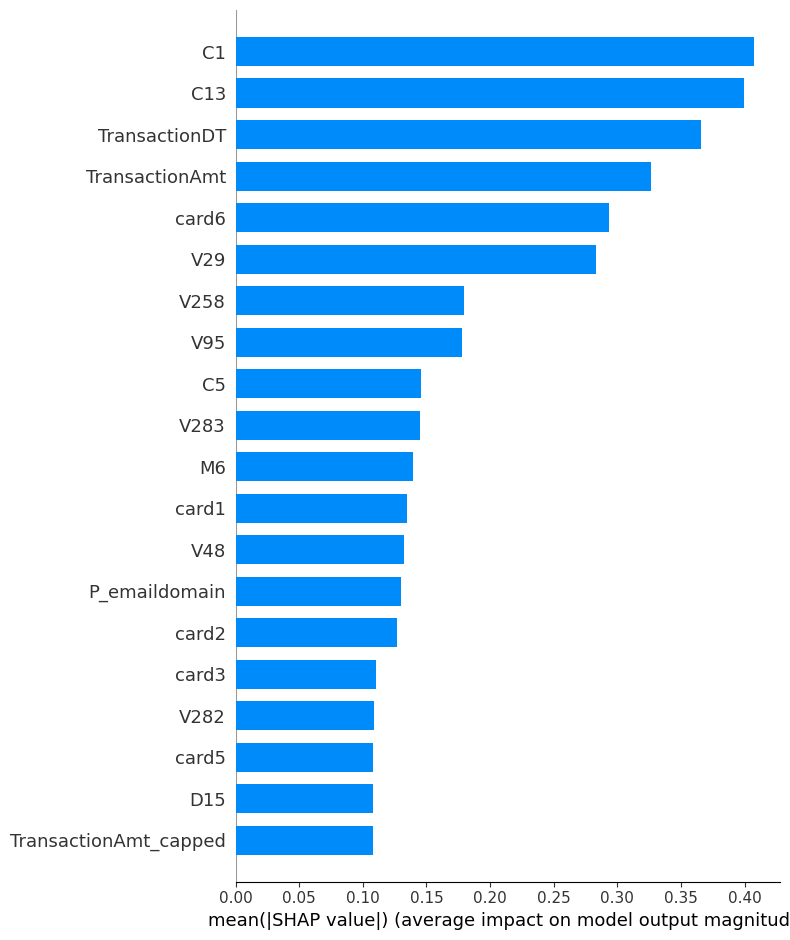

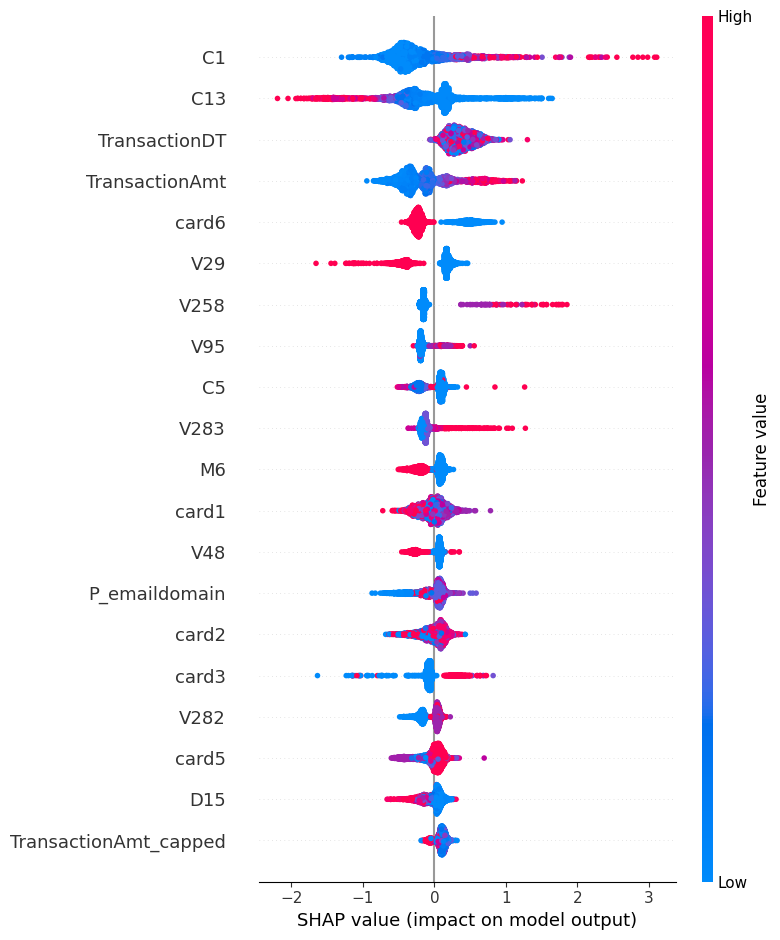

In [96]:
!pip -q install -U shap
import shap

# sample to avoid RAM crash
X_shap = X_test.sample(n=min(3000, len(X_test)), random_state=42)

# SHAP for tree models
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_shap)

# For binary LGBM, shap_values can be:
# - a single array, or
# - a list [class0, class1]. Use class1 if list.
if isinstance(shap_values, list):
    shap_vals = shap_values[1]
else:
    shap_vals = shap_values

shap.summary_plot(shap_vals, X_shap, plot_type="bar", max_display=20)
shap.summary_plot(shap_vals, X_shap, max_display=20)
